<span style="color: lightblue"><font size="15">ATTENTION MAP ANALYSIS</font></span>



# Context-dependent Attention 
---

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%config InlineBackend.figure_format='retina'


##  One layer models
---

### Test example

In [2]:
######## For one layer one context example 

In [3]:
attention_path_AAA = '../results/context_3/attention_analysis__1_layer/attention_context_AAA'
csv_files = [file for file in os.listdir(attention_path_AAA) if file.endswith(".csv")]

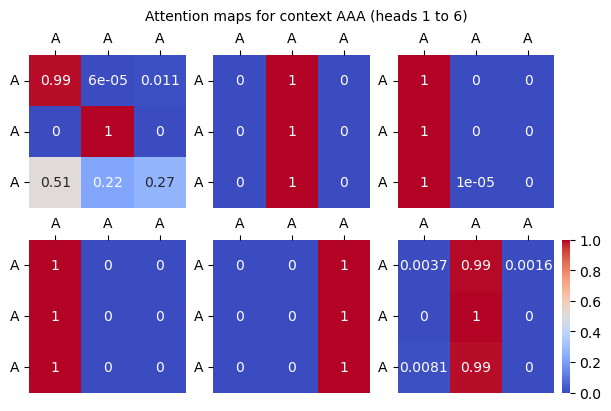

In [84]:
'''
# Sort the files by the head number
csv_files.sort(key=lambda x: int(x.split('layer0_head_')[1].split('.')[0]))

# Loop through each file in the directory
fig, axes = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True)
fig.suptitle("Attention maps for context AAA (heads 1 to 6)", fontsize=10)

for idx, file in enumerate(csv_files):
    if file.startswith("layer0_head_") and file.endswith(".csv"):
        # Extract head number for the title
        head_number = int(file.split('layer0_head_')[1].split('.')[0])
        
        # Read the CSV file into a DataFrame
        attention = pd.read_csv(os.path.join(attention_path_AAA, file))
        attention = attention.round(5)
                
        # Drop the 'Unnamed: 0' column and set it as the index (row names)
        attention.set_index('Unnamed: 0', inplace=True, drop=True)
        # Round values to 5 decimal points
        
        # Rename columns to remove numbers
        attention.columns = [col.split('.')[0] for col in attention.columns]
        
        # Plot the heatmap using the DataFrame with row and column names as letters
        sns.heatmap(attention, annot=True, cmap="coolwarm", cbar=idx == len(csv_files) - 1, ax=axes[idx // 3, idx % 3])
        
        
        # Move the column ticks and labels to the top of the plot
        axes[idx // 3, idx % 3].xaxis.set_ticks_position('top')
        axes[idx // 3, idx % 3].set_ylabel('')
        
        
        for tick in axes[idx // 3, idx % 3].get_yticklabels():
            tick.set_rotation(360)
plt.show()
'''

### <span style="color: purple;"> *Plotting function 1 layer*</span>


In [ ]:
######## For one layer all contexts 

In [4]:
def plot_attention_map(context_folder):
    # Extract the 3-letter sequence from the filename
    subfolder_path=context_folder
    context = subfolder_path.split('_')[-1]
    
    csv_files = [file for file in os.listdir(subfolder_path) if file.endswith(".csv")]
    
    # Sort the files by the head number
    csv_files.sort(key=lambda x: int(x.split('layer0_head_')[1].split('.')[0]))
    
    # Loop through each file in the directory
    fig, axes = plt.subplots(2, 3, figsize=(3, 2), constrained_layout=True)
    fig.suptitle(f"Attention map for context {context}", fontsize=8)
    
    for idx, file in enumerate(csv_files):
        if file.startswith("layer0_head_") and file.endswith(".csv"):
            # Extract head number for the title
            head_number = int(file.split('layer0_head_')[1].split('.')[0])
            
            # Read the CSV file into a DataFrame
            attention = pd.read_csv(os.path.join(subfolder_path, file))
            attention = attention.round(5)
                    
            # Drop the 'Unnamed: 0' column and set it as the index (row names)
            attention.set_index('Unnamed: 0', inplace=True, drop=True)
            
            # Rename columns to remove numbers
            attention.columns = [col.split('.')[0] for col in attention.columns]
            
            # Plot the heatmap using the DataFrame with row and column names as letters
            sns.heatmap(attention, annot=False, cmap= "viridis", cbar=idx == len(csv_files) - 1, ax=axes[idx // 3, idx % 3],vmin=0, vmax=1)

            # Set the title for each subplot
            
            axes[idx // 3, idx % 3].set_ylabel('')
            
            if idx != 0:
                # Remove the ticks and labels for non-top-left plots
                axes[idx // 3, idx % 3].set_xticklabels([])
                axes[idx // 3, idx % 3].set_yticklabels([])
                axes[idx // 3, idx % 3].tick_params(left=False, bottom=False)
            else:
                # Move the column ticks and labels to the top of the plot for the first subplot
                axes[idx // 3, idx % 3].xaxis.set_ticks_position('top')
                axes[idx // 3, idx % 3].xaxis.set_label_position('top')
                
                for tick in axes[idx // 3, idx % 3].get_yticklabels():
                    tick.set_rotation(360)
                    
    plt.show()


### Results 1 layer models

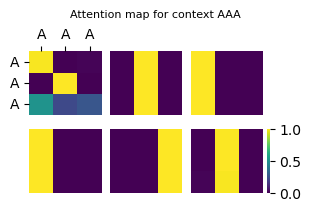

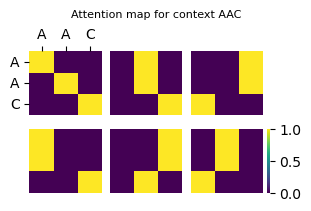

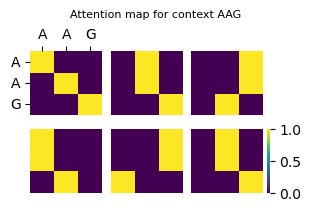

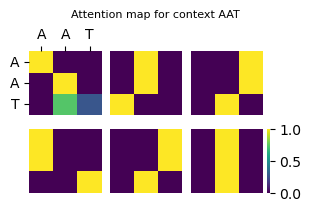

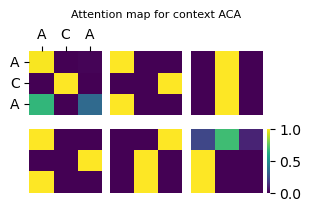

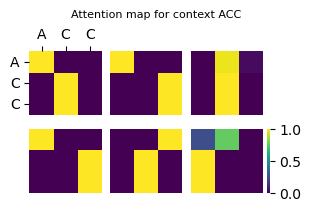

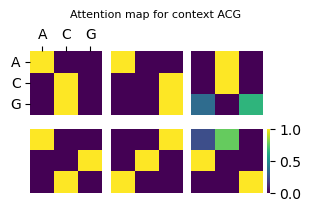

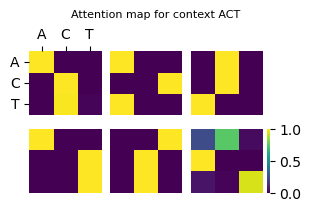

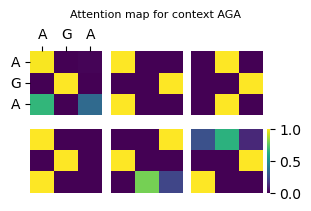

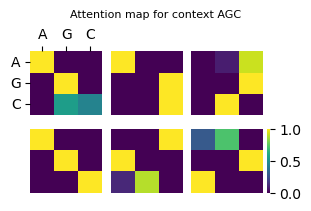

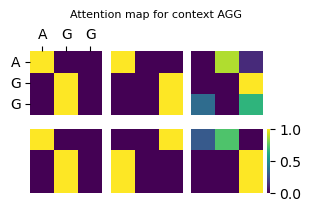

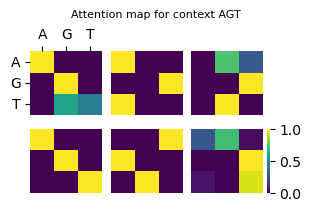

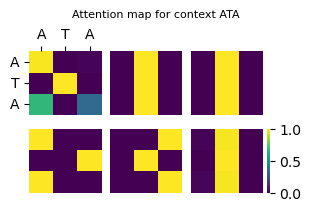

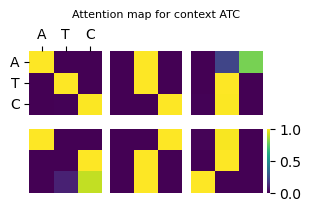

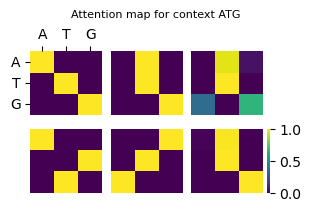

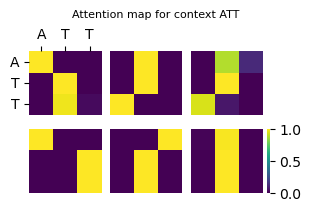

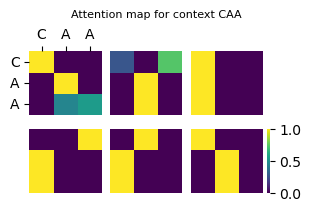

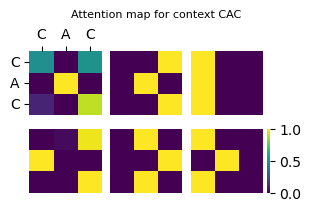

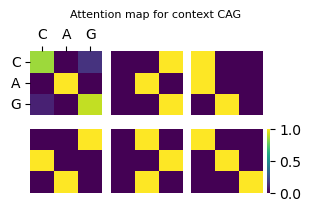

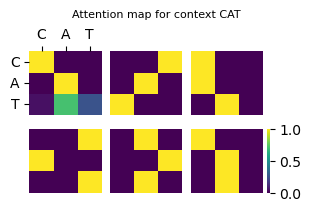

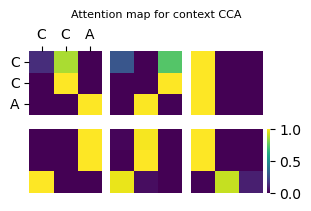

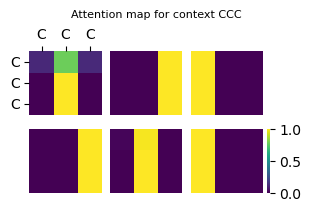

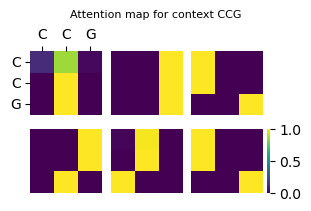

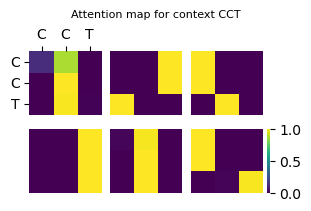

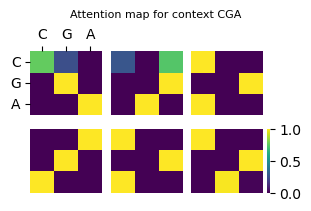

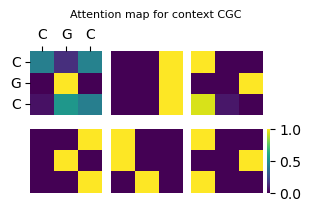

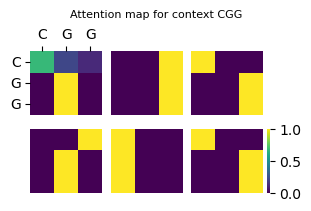

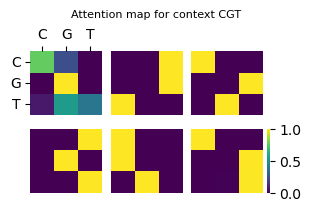

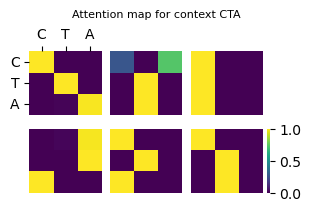

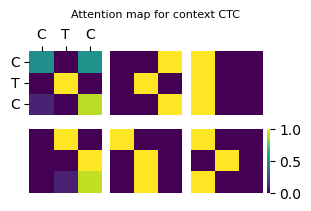

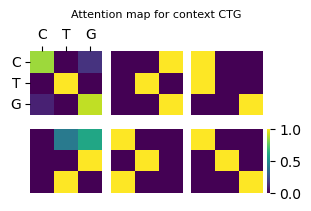

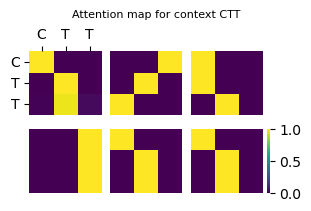

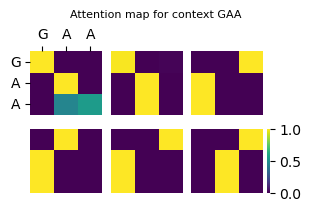

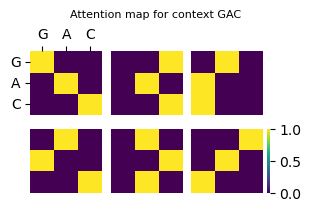

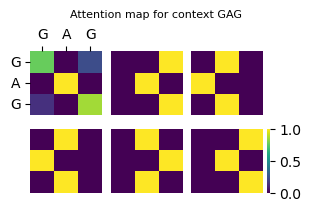

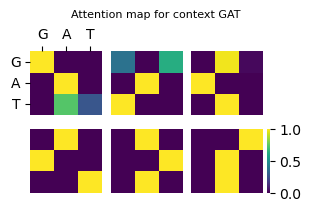

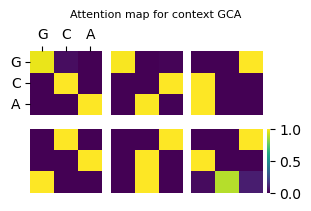

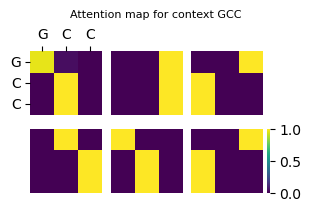

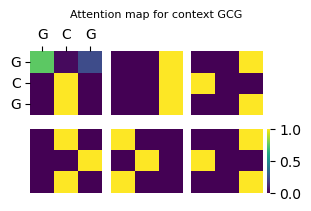

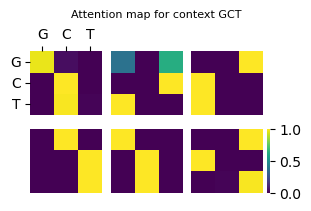

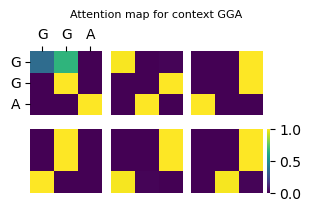

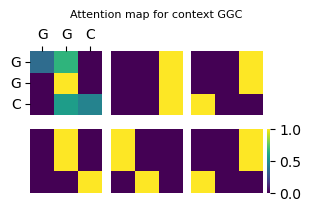

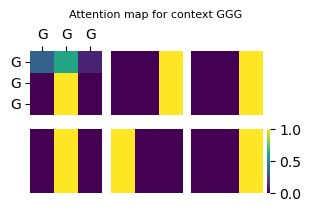

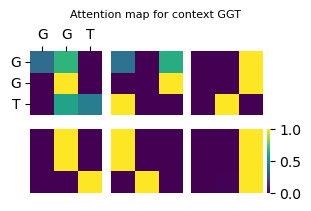

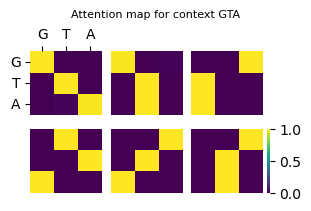

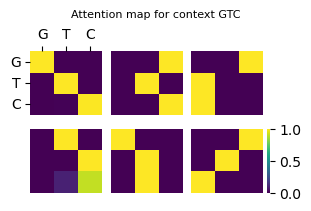

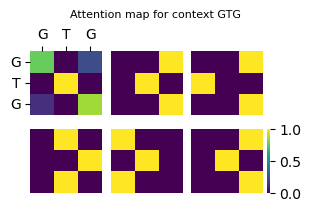

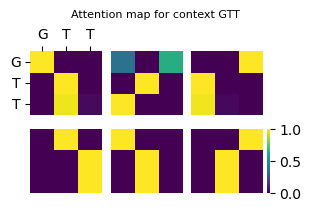

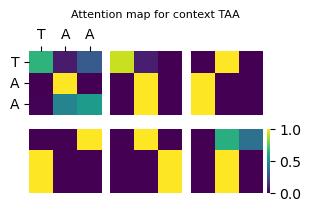

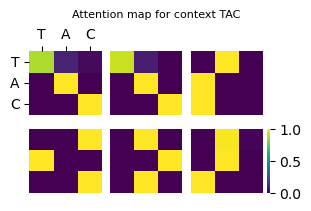

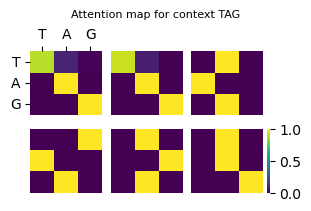

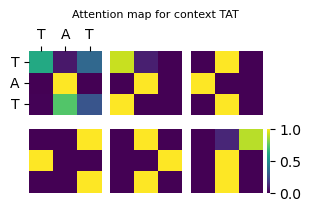

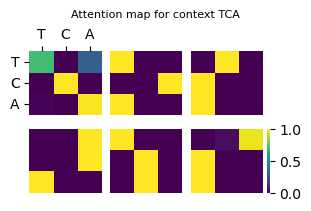

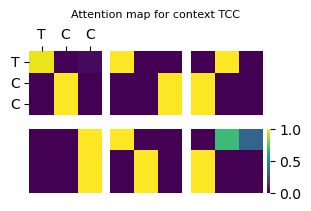

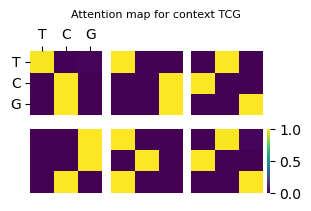

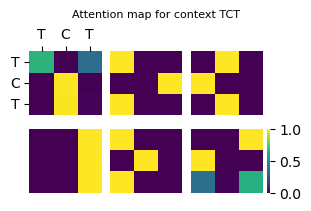

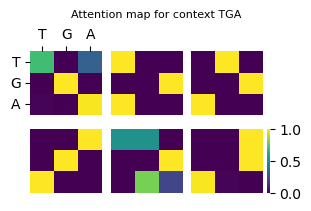

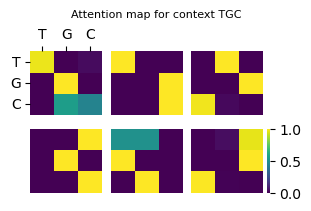

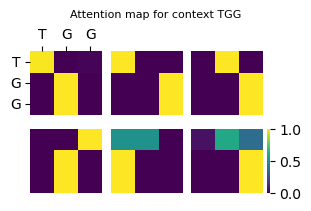

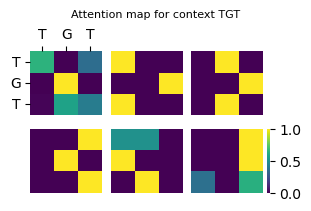

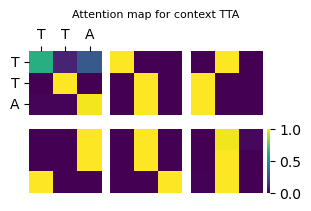

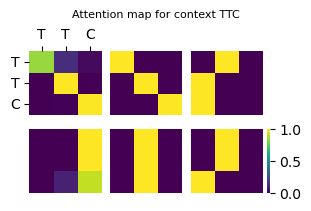

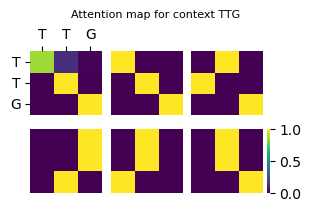

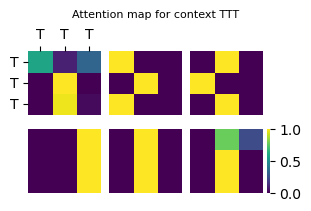

In [5]:
main_folder_path = '../results/context_3/attention_analysis__1_layer'
subfolders = sorted([f for f in os.listdir(main_folder_path) if f.startswith('attention_context_')])

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    plot_attention_map(subfolder_path)

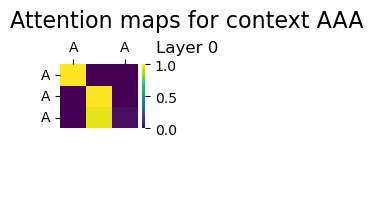

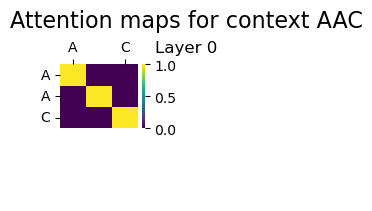

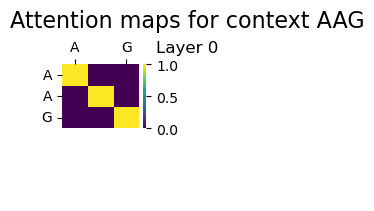

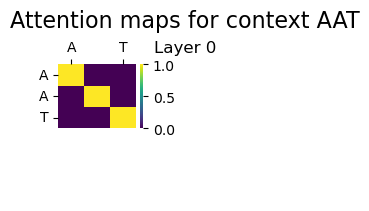

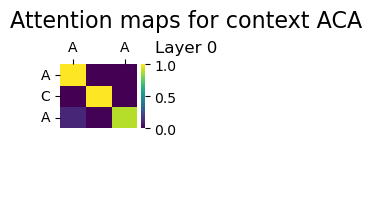

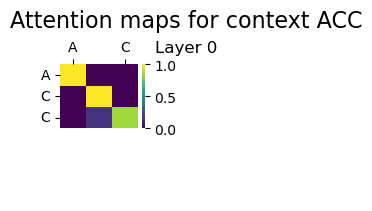

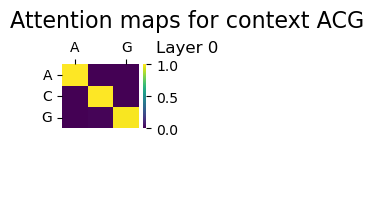

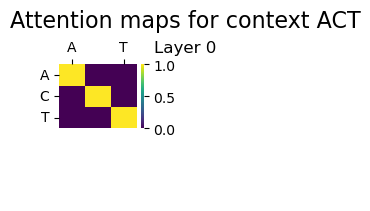

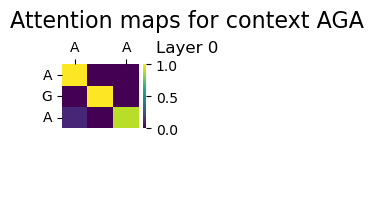

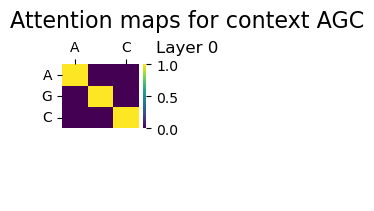

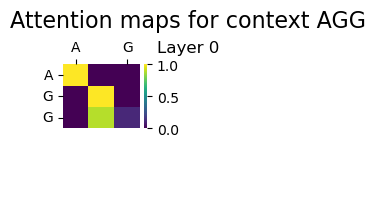

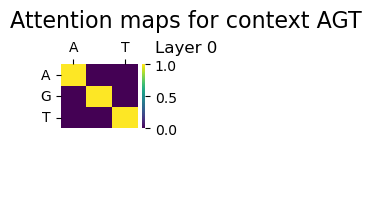

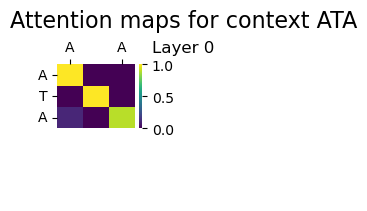

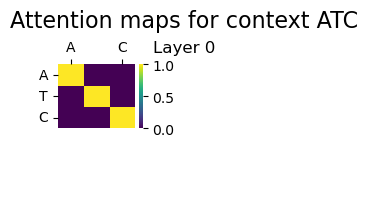

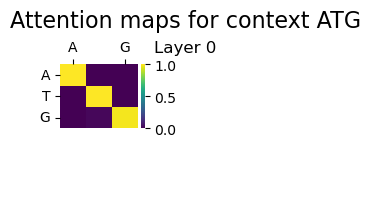

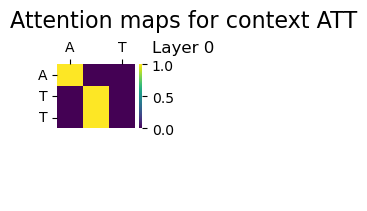

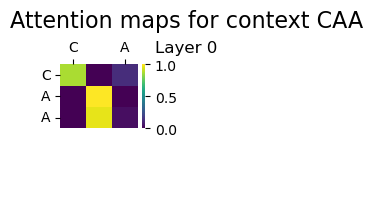

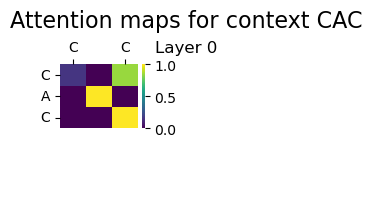

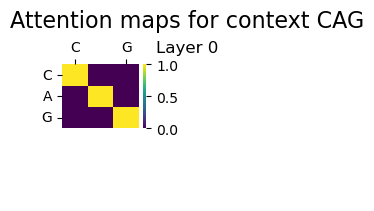

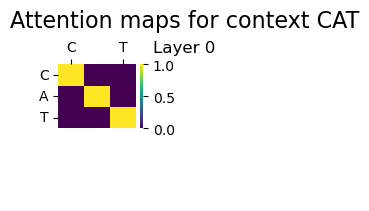

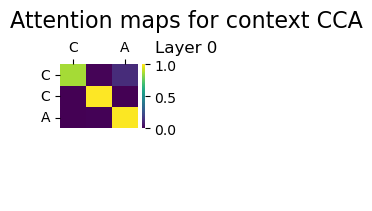

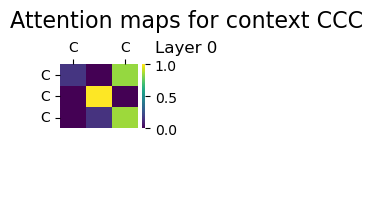

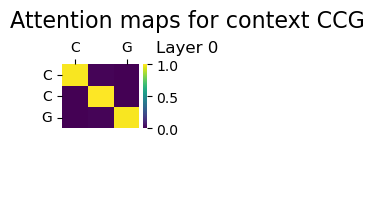

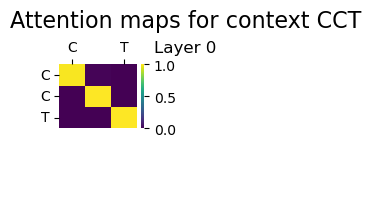

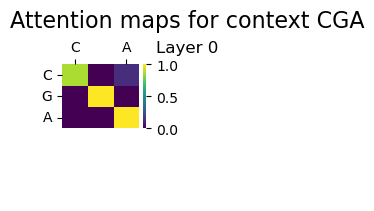

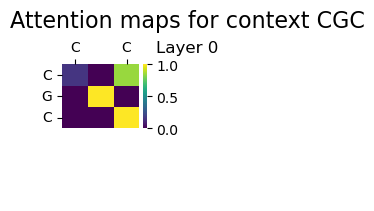

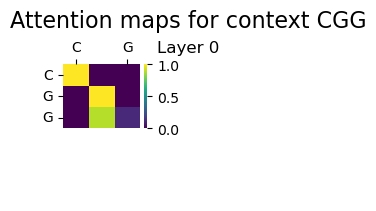

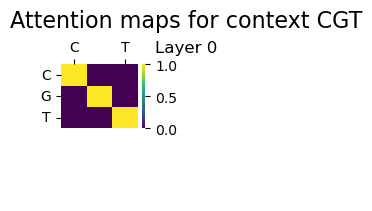

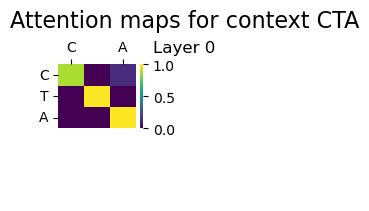

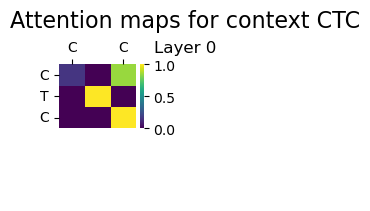

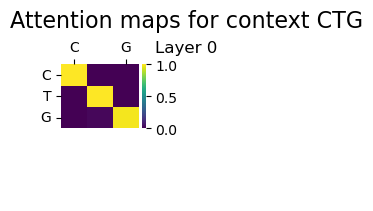

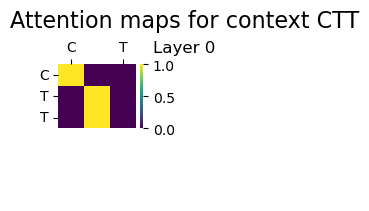

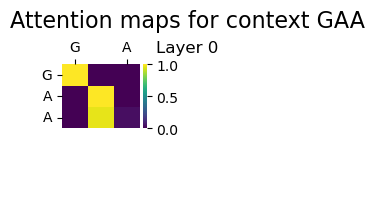

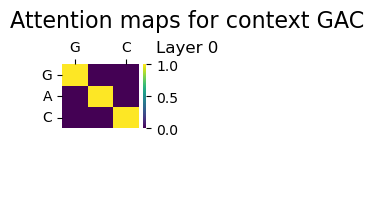

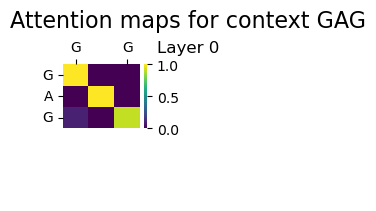

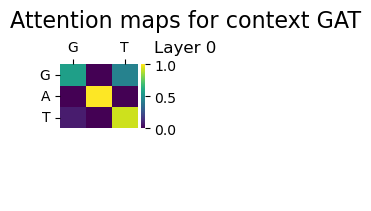

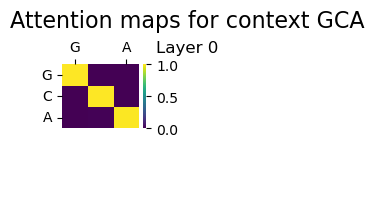

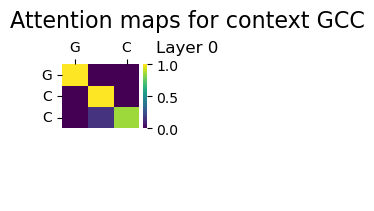

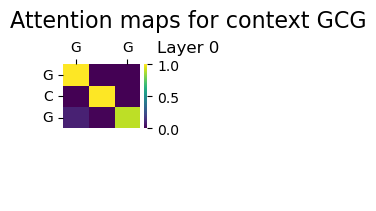

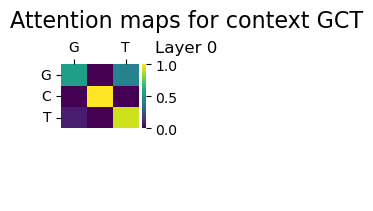

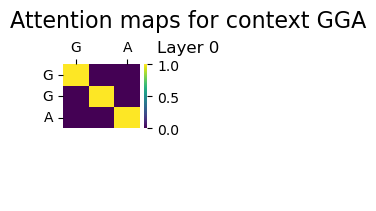

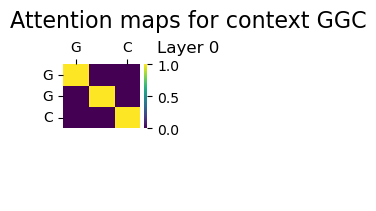

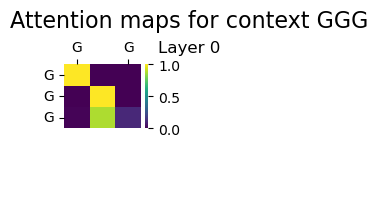

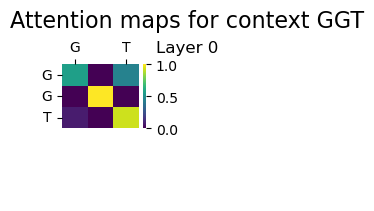

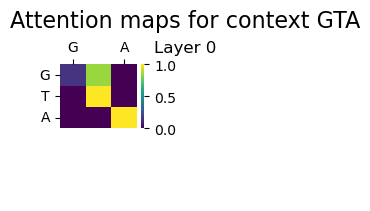

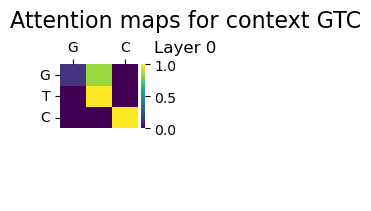

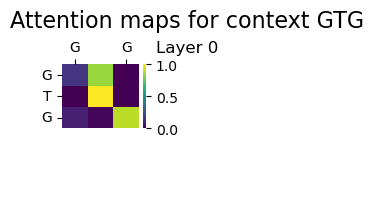

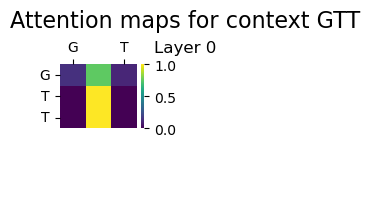

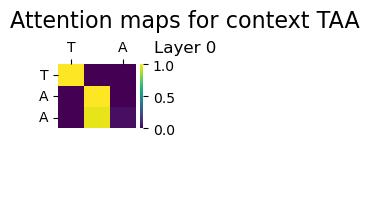

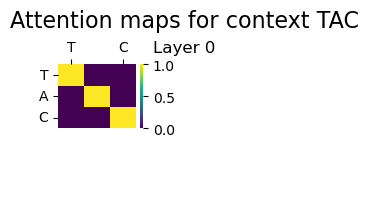

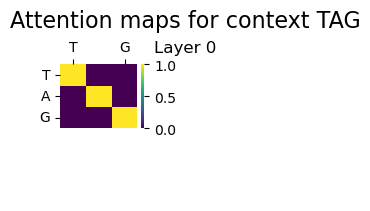

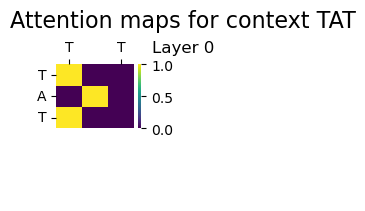

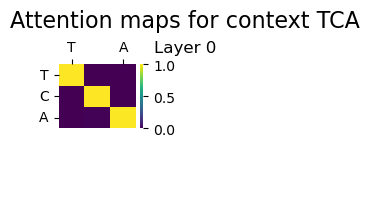

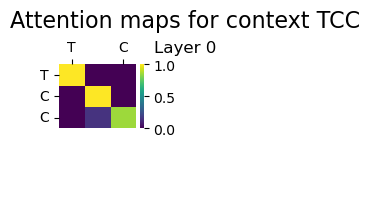

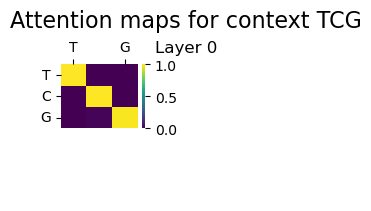

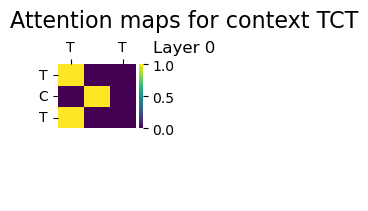

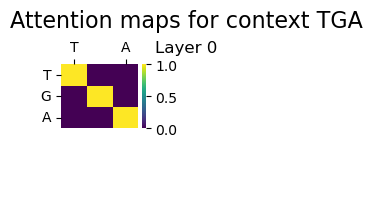

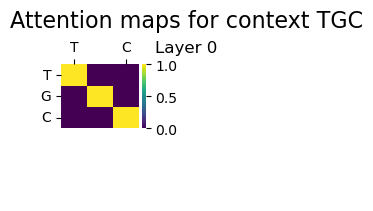

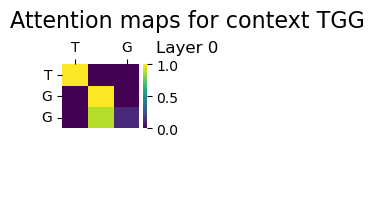

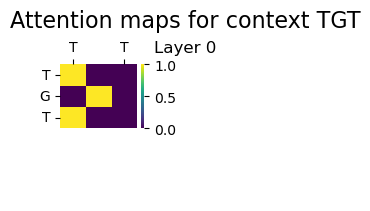

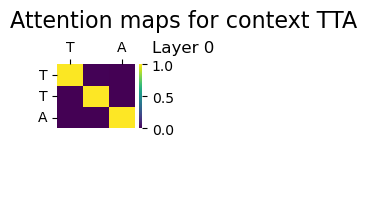

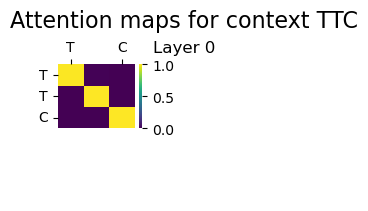

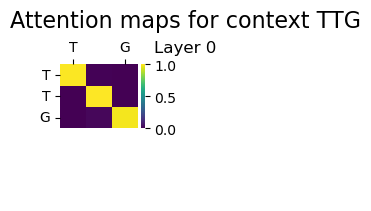

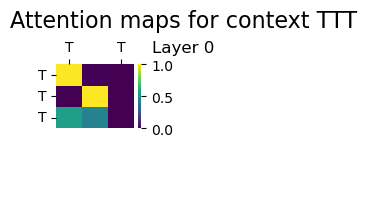

In [7]:
main_folder_path = '../results/context_3/attention_analysis__1_layer_1head'
subfolders = sorted([f for f in os.listdir(main_folder_path) if f.startswith('attention_context_')])

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    plot_attention_map(subfolder_path)

## Multiple layer models
---

###  <span style="color: purple;"> *Plotting function all layers*</span>


In [ ]:
## rows represent queries
## columns represent keys
## -> Positions in rows attend to positions in columns 

In [ ]:
#### for all layers 

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


def plot_attention_map(context_folder, wo_labels=False):
    
    # Suppress specific seaborn and matplotlib warnings about missing glyphs
    warnings.filterwarnings("ignore", message=".*missing from current font.*")

    # Extract the 3-letter sequence from the folder name
    context = context_folder.split('_')[-1]

    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(context_folder) if (file.endswith(".csv") and file.startswith("layer"))] 
    
    # Extract unique layers
    layers = sorted(set(file.split('_')[0] for file in csv_files))
    
    # Determine the number of layers
    num_layers = len(layers)
    
    # Create a large figure to hold all layers
    
    fig, big_axes = plt.subplots(num_layers, 1, figsize=(3, 2 * num_layers), constrained_layout=True) if not wo_labels else plt.subplots(num_layers, 1, figsize=(45, 30 * num_layers), constrained_layout=True) 
    
    # Set the big title at the top

    if "average" in context_folder:
        suffix = "Purine" if context_folder.endswith("purine") else "Pyrimidine" if context_folder.endswith("pyrimidine") else ""
        fig.suptitle(f"Averaged attention maps across all contexts: {suffix}", fontsize=10)

    else:
        fig.suptitle(f"Attention maps for context {context}", fontsize=16)
    
    if num_layers == 1:
        big_axes = [big_axes]
    
    for layer_idx, layer in enumerate(layers):
        # Get files for the current layer
        layer_files = [file for file in csv_files if file.startswith(layer)]
        
        # Sort the files by the head number
        layer_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))
        
        # Set the title for the layer
        big_axes[layer_idx].set_title(f"Layer {layer.split('layer')[1]}", fontsize=12)
        big_axes[layer_idx].axis('off')
        
        # Create subplots for the current layer within the larger figure
        gs = big_axes[layer_idx].get_gridspec()
        ax_layer = fig.add_subplot(gs[layer_idx])
        ax_layer.axis('off')
        sub_gs = gs[layer_idx].subgridspec(2, 3)

        for idx, file in enumerate(layer_files):
            if file.startswith(layer) and file.endswith(".csv"):
                # Extract head number for the title
                head_number = int(file.split('_')[2].split('.')[0])
                
                # Read the CSV file into a DataFrame
                attention = pd.read_csv(os.path.join(context_folder, file))
                attention = attention.round(5)
                        
                # Drop the 'Unnamed: 0' column and set it as the index (row names)
                attention.set_index('Unnamed: 0', inplace=True, drop=True)
                
                # Rename columns to remove numbers
                attention.columns = [col.split('.')[0] for col in attention.columns]
                
                # Plot the heatmap using the DataFrame with row and column names as letters
                ax = fig.add_subplot(sub_gs[idx // 3, idx % 3])
                sns.heatmap(attention, annot=False, cmap="viridis", cbar=idx == len(layer_files) - 1, ax=ax, vmin=0, vmax=1)

                # Set the title for each subplot
                ax.set_title('')
                ax.set_ylabel('')

                if not wo_labels:

                    
                    if idx != 0:
                        # Remove the ticks and labels for non-top-left plots
                        ax.set_xticklabels([])
                        ax.set_yticklabels([])
                        ax.tick_params(left=False, bottom=False)
                    else:
                        # Move the column ticks and labels to the top of the plot for the first subplot
                        ax.xaxis.set_ticks_position('top')
                        ax.xaxis.set_label_position('top')
                        
                        for tick in ax.get_yticklabels():
                            tick.set_rotation(360)

    plt.show()

### Results 6 L 6 H 

In [42]:
context_folder = '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_AAA'
plot_attention_map(context_folder)

FileNotFoundError: [Errno 2] No such file or directory: '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_AAA'

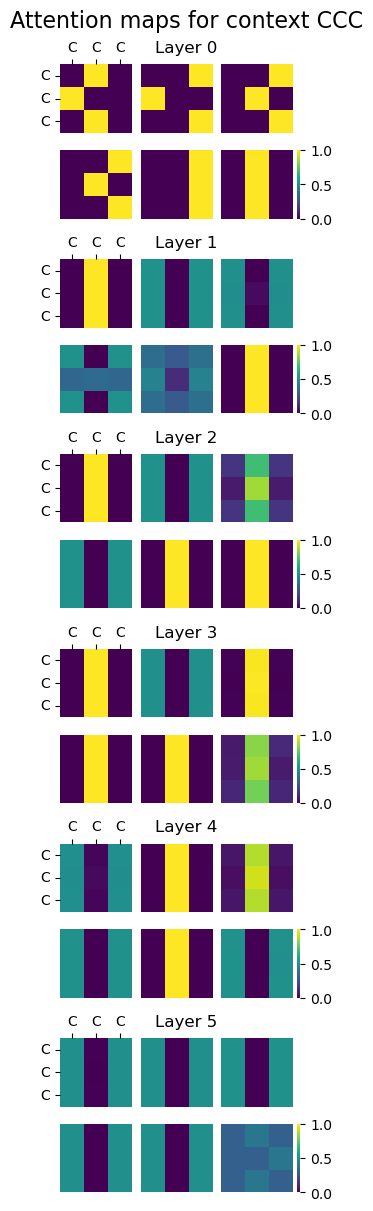

In [66]:
context_folder = '../results/context_3/attention_analysis/attention_context_CCC'
plot_attention_map(context_folder)

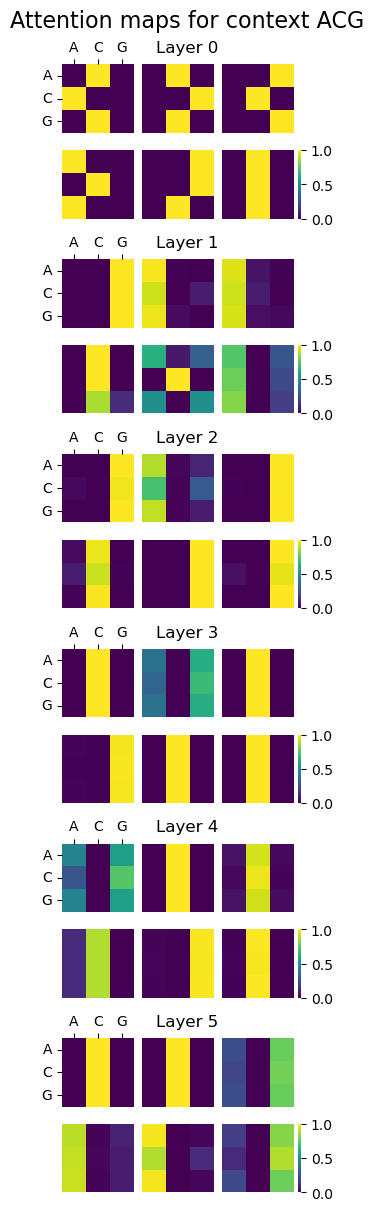

In [67]:
context_folder = '../results/context_3/attention_analysis/attention_context_ACG'
plot_attention_map(context_folder)

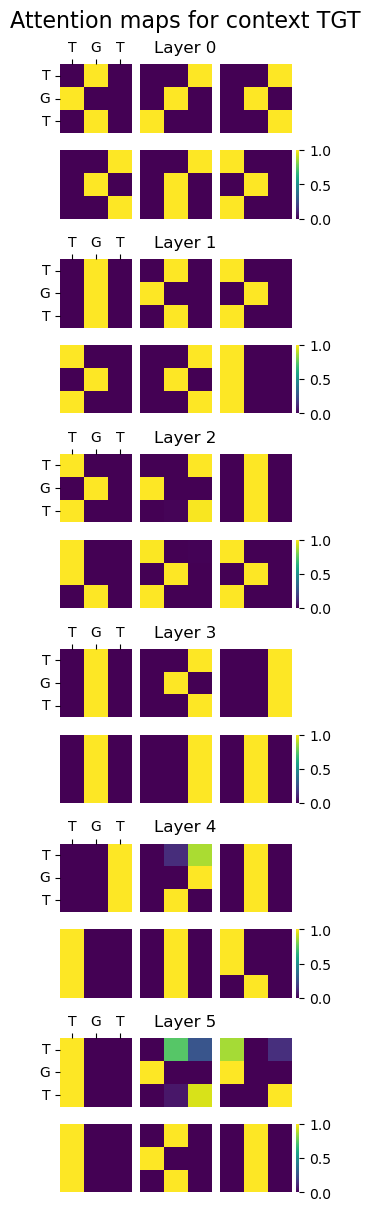

In [68]:
context_folder = '../results/context_3/attention_analysis/attention_context_TGT'
plot_attention_map(context_folder)

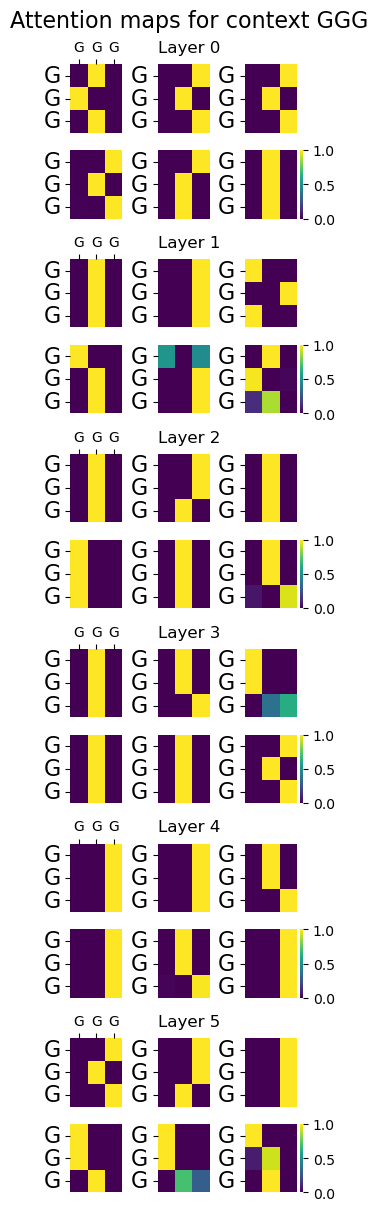

In [43]:
context_folder = '../results/context_3/attention_analysis/attention_context_GGG'
plot_attention_map(context_folder)

In [ ]:
#Generally rather look at earlier layers where positions still are positions

## Attention results for mini 3 context model:
# 1 layer 1 head: For almost all contexts the first and second base attend almost exclusively to themselves. 
#                 Attention maps for similar inputs look similar 
# 1 layer 6 heads: The first head often acts as described above, in particular the middle base attends to itself. 
#                 Attention for the other heads is more complex
# 6 layers 6 heads: No clear patterns, all heads act differntly.
#                   Very common that all positions exclusively attend to the same other position. 
#                   First heads in first layer often act very similar

### Results 2 L 2 H

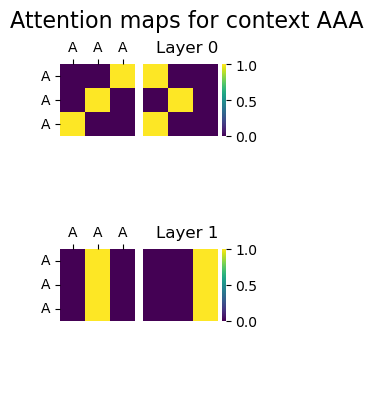

In [5]:
context_folder = '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_AAA'
plot_attention_map(context_folder)

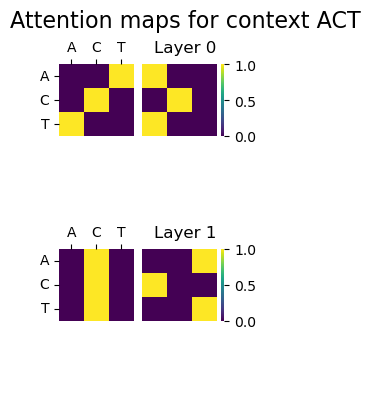

In [6]:
context_folder = '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_ACT'
plot_attention_map(context_folder)

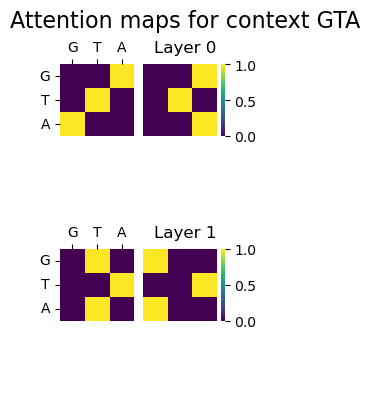

In [7]:
context_folder = '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_GTA'
plot_attention_map(context_folder)

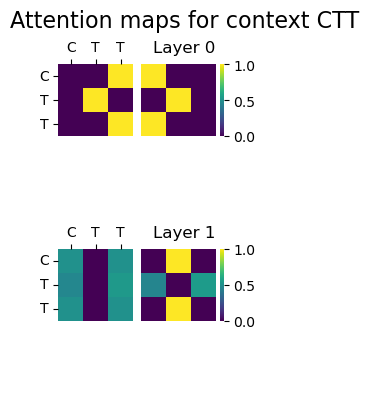

In [8]:
context_folder = '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_CTT'
plot_attention_map(context_folder)

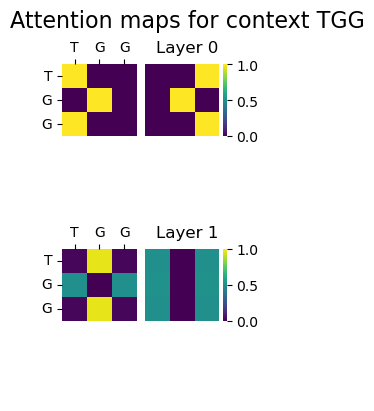

In [9]:
context_folder = '../results/context_3/attention_analysis/model_E_2h2ld384/attention_context_TGG'
plot_attention_map(context_folder)

# Averaged Attention
---


### <span style="color: purple;"> *Plotting average function*</span>


In [ ]:
'''
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_average_attention(main_folder):
    layers_array = None
    context_folders = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    for context_folder in context_folders:
        context = context_folder.split('_')[-1]
        folder_path = os.path.join(main_folder, context_folder)
        
        csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv") and file.startswith("layer")]
        layers = sorted(set(file.split('_')[0] for file in csv_files))
        num_layers = len(layers)
        
        if layers_array is None:
            layers_array = [None] * num_layers

        for layer_idx, layer in enumerate(layers):
            layer_files = [file for file in csv_files if file.startswith(layer)]
            layer_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))
            num_heads = len(layer_files)
            
            if layers_array[layer_idx] is None:
                layers_array[layer_idx] = [None] * num_heads

            for idx, file in enumerate(layer_files):
                head_number = int(file.split('_')[2].split('.')[0])
                attention = pd.read_csv(os.path.join(folder_path, file))
                attention.set_index('Unnamed: 0', inplace=True, drop=True)
                attention.columns = [col.split('.')[0] for col in attention.columns]
                
                if layers_array[layer_idx][idx] is None:
                    layers_array[layer_idx][idx] = []
                layers_array[layer_idx][idx].append(attention)


    os.makedirs(os.path.join(main_folder, 'average'), exist_ok=True)
    for layer_idx, heads in enumerate(layers_array):
        for head_idx in range(len(heads)):
            # Relabel columns and rows as pos1, pos2, pos3, etc.
            for df in heads[head_idx]:
                df.columns = [f'pos{i+1}' for i in range(len(df.columns))]
                df.index   = [f'pos{i+1}' for i in range(len(df.index))]
            
            # Initialize an empty DataFrame with the same shape as the first DataFrame
            sum_df = heads[head_idx][0].copy()
            sum_df.iloc[:, :] = 0  # Set all values to 0

            # Sum the DataFrames
            for df in heads[head_idx]:
                sum_df += df
                #print('\n with df \n', df,'\n now the sum is \n',sum_df)

            # Compute and store the average
            layers_array[layer_idx][head_idx] = sum_df / 64
            #print(len(heads[head_idx]))
            file_path = os.path.join(main_folder, 'average', f'layer{layer_idx + 1}_head_{head_idx + 1}.csv')
            av_attention = layers_array[layer_idx][head_idx] 
            av_attention.to_csv(file_path)
            #print(av_attention)
            

    return layers_array
'''

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_average_attention(main_folder, purin_vs_pyrim=False, context3=False, only_first=False):
    layers_array = None
    context_folders = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    if purin_vs_pyrim:
        # to do this works only for 3b context atm see [-1][1]
        purine_folders     = [folder for folder in context_folders if folder.split('_')[-1][1] in 'AG']
        pyrimidine_folders = [folder for folder in context_folders if folder.split('_')[-1][1] in 'CT']
        context_folders    = [purine_folders, pyrimidine_folders]
        context_types = ['purine', 'pyrimidine']
    else:
        context_folders = [context_folders]

    for context_type_idx, context_group in enumerate(context_folders):
        if only_first and int(context_type_idx)>70: break
        print('context_type_idx',context_type_idx)
        layers_array = None
        for context_folder in context_group:
            context = context_folder.split('_')[-1]
            print('context', context, end=' ')
            folder_path = os.path.join(main_folder, context_folder)
            
            csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv") and file.startswith("layer")]
            layers = sorted(set(file.split('_')[0] for file in csv_files))
            num_layers = len(layers)
            
            if layers_array is None:
                layers_array = [None] * num_layers

            for layer_idx, layer in enumerate(layers):
                if only_first and layer_idx!=0: break
                layer_files = [file for file in csv_files if file.startswith(layer)]
                layer_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))
                num_heads = len(layer_files)
                
                if layers_array[layer_idx] is None:
                    layers_array[layer_idx] = [None] * num_heads

                for idx, file in enumerate(layer_files):
                    head_number = int(file.split('_')[2].split('.')[0])
                    attention = pd.read_csv(os.path.join(folder_path, file))
                    attention.set_index('Unnamed: 0', inplace=True, drop=True)
                    attention.columns = [col.split('.')[0] for col in attention.columns]
                    
                    if layers_array[layer_idx][idx] is None:
                        layers_array[layer_idx][idx] = []
                    layers_array[layer_idx][idx].append(attention)

        os.makedirs(os.path.join(main_folder, 'average'), exist_ok=True)
        if purin_vs_pyrim:
            os.makedirs(os.path.join(main_folder, 'average/purine'), exist_ok=True)
            os.makedirs(os.path.join(main_folder, 'average/pyrimidine'), exist_ok=True)


        for layer_idx, heads in enumerate(layers_array):
            if only_first and layer_idx!=0: break
            for head_idx in range(len(heads)):
                if layer_idx!=0 and head_idx>=5: break
                print(layer_idx, head_idx, end=' ')
                
                # Relabel columns and rows as pos1, pos2, pos3, etc.
                for df in heads[head_idx]:
                    df.columns = [f'pos{i+1}' for i in range(len(df.columns))]
                    df.index   = [f'pos{i+1}' for i in range(len(df.index))]
                
                # Initialize an empty DataFrame with the same shape as the first DataFrame
                sum_df = heads[head_idx][0].copy()
                sum_df.iloc[:, :] = 0  # Set all values to 0

                # Sum the DataFrames
                for df in heads[head_idx]:
                    sum_df += df

                # Compute and store the average
                if layer_idx==0 and head_idx==0: 
                    if context3:
                        divisor = 32 if purin_vs_pyrim else 64
                        print("Assuming context size 3 and deviding by", divisor)
                    else:
                        divisor = len(heads[head_idx])
                        print('Deviding by', divisor, ',which should correspond to number of examples and files in folder')
                layers_array[layer_idx][head_idx] = sum_df / divisor    
                
                # Save the averaged attention to a CSV file
                if purin_vs_pyrim:
                    context_label = context_types[context_type_idx]
                    file_path = os.path.join(main_folder, f'average/{context_label}', f'layer{layer_idx + 1}_head_{head_idx + 1}.csv')
                else:
                    file_path = os.path.join(main_folder, 'average', f'layer{layer_idx + 1}_head_{head_idx + 1}.csv')
                
                av_attention = layers_array[layer_idx][head_idx]
                av_attention.to_csv(file_path)

    return layers_array


### results not Pur/Pyr specific

In [138]:
modelE_folder = '../results/context_3/attention_analysis_model_E_2h2ld384'
modelE_average_attention = calculate_average_attention(modelE_folder)

In [139]:
big_model_folder = '../results/context_3/attention_analysis'
big_model_average_attention = calculate_average_attention(big_model_folder)

In [140]:
oldmodelB_folder = '../results/context_3/attention_analysis__1_layer_1head'
oldmodelB_average_attention = calculate_average_attention(oldmodelB_folder)

In [144]:
oldmodelA_folder = '../results/context_3/attention_analysis__1_layer'
oldmodelA_average_attention = calculate_average_attention(oldmodelA_folder)

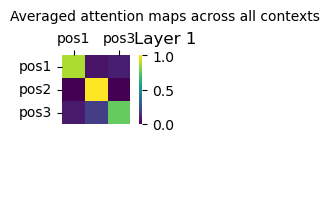

In [5]:
plot_attention_map('../results/context_3/attention_analysis__1_layer_1head/average')

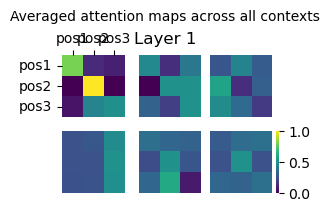

In [145]:
plot_attention_map('../results/context_3/attention_analysis__1_layer/average')

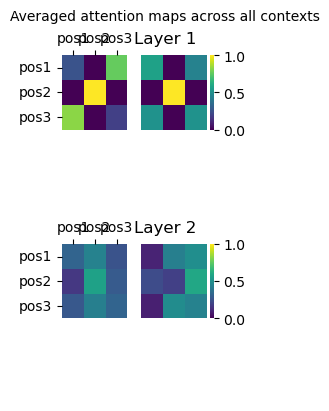

In [11]:
plot_attention_map('../results/context_3/attention_analysis_model_E_2h2ld384/average')

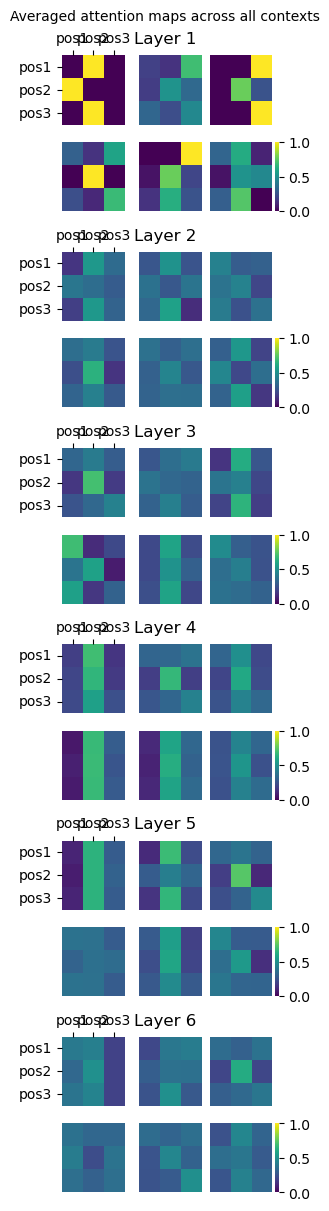

In [141]:
plot_attention_map('../results/context_3/attention_analysis/average')

In [ ]:
'''
Conclusion:
In very small networks, middle attends only to itself, surrounding positions dont really attend to middle 
Small networks also only make decisions based on middle position
In higher layers, much more diluted, different for each example 
    Pattern: in big network in many heads of middle layers, all positions tend to atted to the middle position


## results Purin vs Pyrimidine split

####   2 Head 2 Layer Model E

In [8]:
modelE_folder = '../results/context_3/attention_analysis_model_E_2h2ld384'

In [9]:
# calculating average attention
modelE_average_attention = calculate_average_attention(modelE_folder, purin_vs_pyrim=False)
modelE_average_attention = calculate_average_attention(modelE_folder, purin_vs_pyrim=True)

context_type_idx 0
context CTT context TTC context CGG context TGA context GTG context checkpoints context AAG context TCA context TCT context CGT context AAC context TTG context CAA context CCA context TAA context GTA context GCA context ACG context TCC context AGG context CTA context AGC context GCT context ACA context CTC context TTT context GGG context GCC context ATC context AAA context GGA context GGT context CAT context CCT context GAC context CCC context CTG context GAG context ATG context average context GTC context AGA context ATT context GGC context CAG context ACC context TTA context ACT context TGC context GCG context TAG context AAT context CCG context AGT context TGT context GAT context CGC context TGG context CGA context CAC context ATA context TAT context TAC context GAA context TCG context GTT 0 0 Deviding by 65 ,which should correspond to number of examples and files in folder
0 1 1 0 1 1 context_type_idx 0
context CGG context TGA context AAG context CGT context AAC 

In [10]:
#plotting average attention
plot_attention_map('../results/context_3/attention_analysis_model_E_2h2ld384/average')
plot_attention_map('../results/context_3/attention_analysis_model_E_2h2ld384/average/purine')
plot_attention_map('../results/context_3/attention_analysis_model_E_2h2ld384/average/pyrimidine')


IndexError: list index out of range

####   6 Head 1 Layer Model A

In [6]:
oldmodelA_folder = '../results/context_3/attention_analysis__1_layer'
#calculate_average_attention(oldmodelA_folder, purin_vs_pyrim=False,context3=True)
res = calculate_average_attention(oldmodelA_folder, purin_vs_pyrim=True, context3=True)

NameError: name 'calculate_average_attention' is not defined

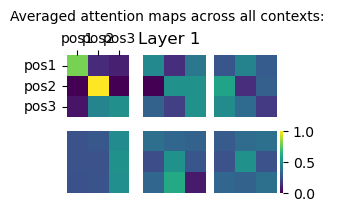

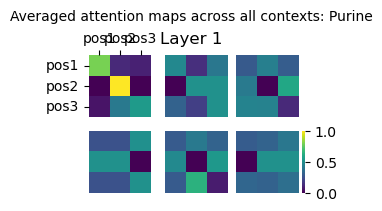

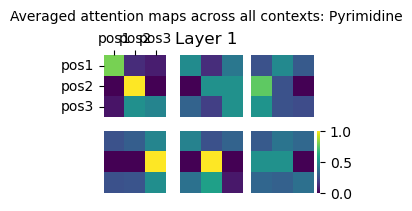

In [66]:
plot_attention_map('../results/context_3/attention_analysis__1_layer/average')
plot_attention_map('../results/context_3/attention_analysis__1_layer/average/purine')
plot_attention_map('../results/context_3/attention_analysis__1_layer/average/pyrimidine')

####   1 Head 1 Layer Model B

In [53]:
oldmodelB_folder = '../results/context_3/attention_analysis__1_layer_1head'
oldmodelB_average_attention = calculate_average_attention(oldmodelB_folder, purin_vs_pyrim=False,context3=True)
oldmodelB_average_attention = calculate_average_attention(oldmodelB_folder, purin_vs_pyrim=True, context3=True)

Assuming context size 3 and deviding by 64
Assuming context size 3 and deviding by 32
Assuming context size 3 and deviding by 32


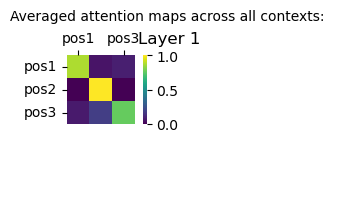

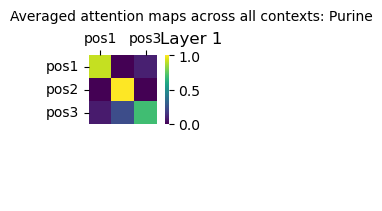

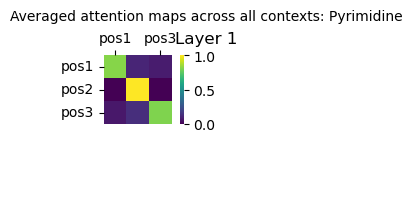

In [54]:
plot_attention_map('../results/context_3/attention_analysis__1_layer_1head/average')
plot_attention_map('../results/context_3/attention_analysis__1_layer_1head/average/purine')
plot_attention_map('../results/context_3/attention_analysis__1_layer_1head/average/pyrimidine')

####   6 Head 6 Layer Model 

In [59]:
l6h6_model_folder= '../results/context_3/attention_analysis'
#res= calculate_average_attention(l6h6_model_folder, purin_vs_pyrim=False,context3=True)
res= calculate_average_attention(l6h6_model_folder, purin_vs_pyrim=True)

Deviding by 32 ,which should correspond to number of examples and files in folder
Deviding by 32 ,which should correspond to number of examples and files in folder


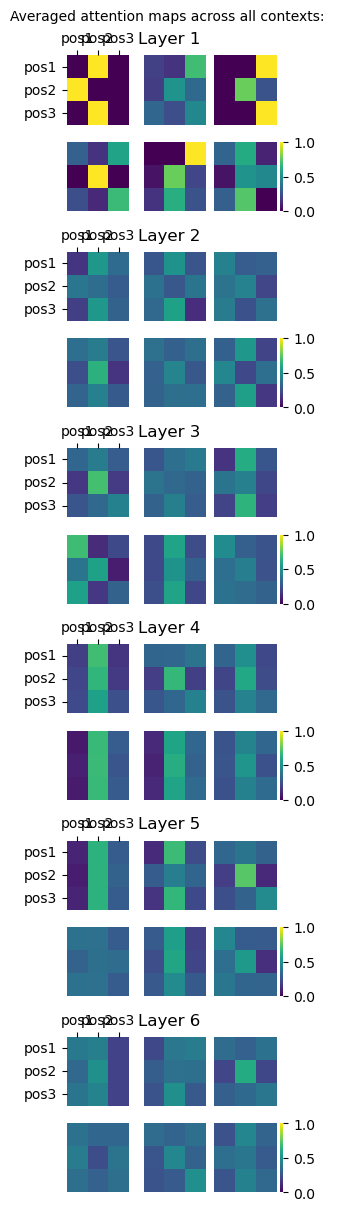

In [60]:
plot_attention_map('../results/context_3/attention_analysis/average')

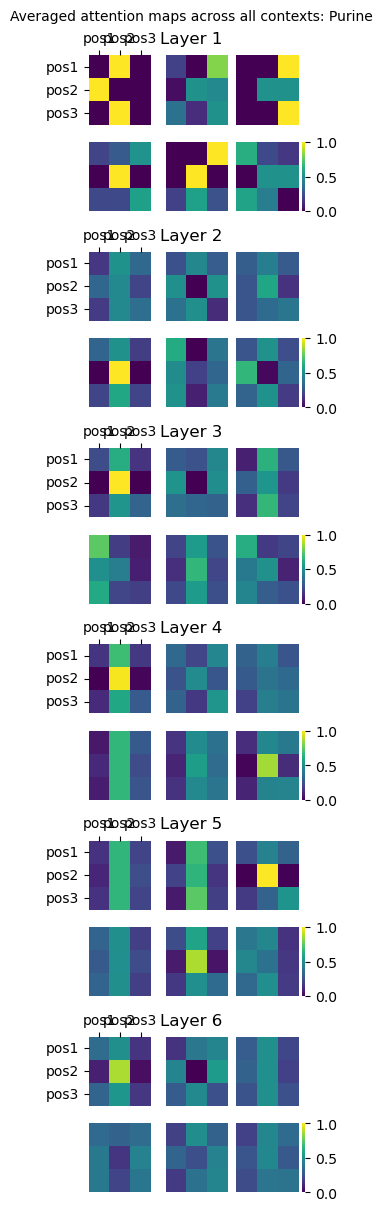

In [61]:
plot_attention_map('../results/context_3/attention_analysis/average/purine')

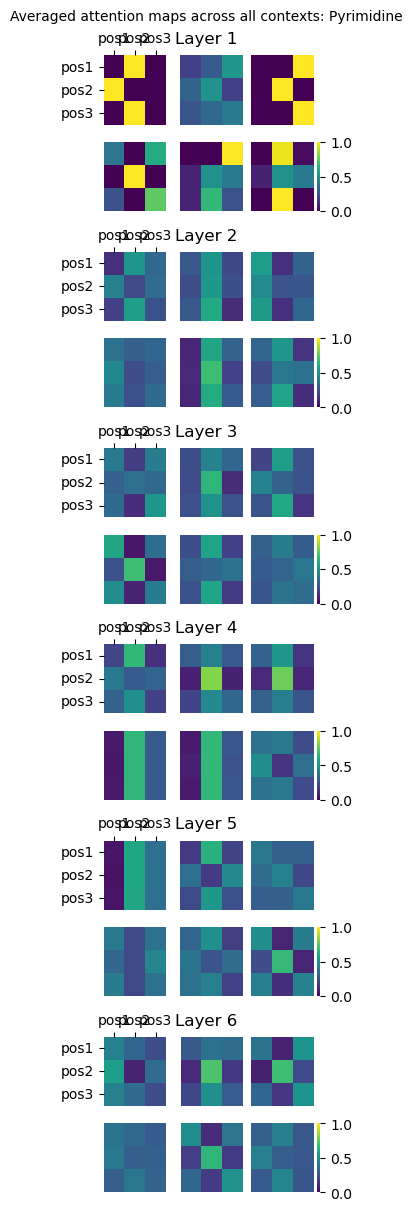

In [62]:
plot_attention_map('../results/context_3/attention_analysis/average/pyrimidine')

#  255 context maps
---

## <span style="color: purple;"> *function 255*</span>


In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific seaborn and matplotlib warnings about missing glyphs
warnings.filterwarnings("ignore", message=".*missing from current font.*")

def plot_attention_map(context_folder, wo_labels=False, big=False, zoom=None, from_end=False, make_brighter=1):
    # Extract the 3-letter sequence from the folder name
    context = context_folder.split('_')[-1]

    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(context_folder) if (file.endswith(".csv") and file.startswith("layer"))] 
    
    # Extract unique layers
    layers = sorted(set(file.split('_')[0] for file in csv_files))
    
    # Determine the number of layers
    num_layers = len(layers)
    
    # Create a large figure to hold all layers
    fig, big_axes = plt.subplots(num_layers, 1, figsize=(3, 2 * num_layers), constrained_layout=True) if not big else plt.subplots(num_layers, 1, figsize=(45, 30 * num_layers), constrained_layout=True) 
    
    # Set the big title at the top
    if context_folder.endswith("average"):  
        fig.suptitle(f"Averaged attention maps across all contexts", fontsize=10)
    else:
        fig.suptitle(f"Attention maps for context {context}", fontsize=16)
    
    if num_layers == 1:
        big_axes = [big_axes]
    
    for layer_idx, layer in enumerate(layers):
        # Get files for the current layer
        layer_files = [file for file in csv_files if file.startswith(layer)]
        
        # Sort the files by the head number
        layer_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))
        
        # Set the title for the layer
        big_axes[layer_idx].set_title(f"Layer {layer.split('layer')[1]}", fontsize=12)
        big_axes[layer_idx].axis('off')
        
        # Create subplots for the current layer within the larger figure
        gs = big_axes[layer_idx].get_gridspec()
        ax_layer = fig.add_subplot(gs[layer_idx])
        ax_layer.axis('off')
        sub_gs = gs[layer_idx].subgridspec(2, 3)

        for idx, file in enumerate(layer_files):
            if file.startswith(layer) and file.endswith(".csv"):
                # Extract head number for the title
                head_number = int(file.split('_')[2].split('.')[0])
                
                # Read the CSV file into a DataFrame
                attention = pd.read_csv(os.path.join(context_folder, file))
                attention = attention.round(5)
                        
                # Drop the 'Unnamed: 0' column and set it as the index (row names)
                attention.set_index('Unnamed: 0', inplace=True, drop=True)
                
                # Rename columns to remove numbers
                attention.columns = [col.split('.')[0] for col in attention.columns]
                
                # Multiply the attention values to make them brighter
                attention *= make_brighter

                # Zoom into the middle rows if zoom is specified
                if zoom:
                    if not from_end:
                        start_row = (len(attention) - zoom) // 2
                        end_row = start_row + zoom
                        attention = attention.iloc[start_row:end_row]
                        # Relabel the rows relative to the middle position
                        attention.index = range(-(zoom // 2), zoom // 2 + (zoom % 2))
                    else:
                        start_row = (len(attention) - zoom)
                        attention = attention.iloc[start_row:]
                        # Relabel the rows relative to the middle position
                        attention.index = range(-(zoom),0)               

                # Plot the heatmap using the DataFrame with row and column names as letters
                ax = fig.add_subplot(sub_gs[idx // 3, idx % 3])
                sns.heatmap(attention, annot=False, cmap="viridis", cbar=idx == len(layer_files) - 1, ax=ax, vmin=0, vmax=1)

                # Set the title for each subplot
                ax.set_title('')
                ax.set_ylabel('', fontsize=16)

                if not wo_labels:
                    if idx != 0:
                        # Remove the x-axis ticks and labels for non-top-left plots
                        ax.set_xticklabels([])
                        ax.tick_params(bottom=False)
                    else:
                        # Move the column ticks and labels to the top of the plot for the first subplot
                        ax.xaxis.set_ticks_position('top')
                        ax.xaxis.set_label_position('top')
                        
                    for tick in ax.get_yticklabels():
                        tick.set_rotation(360)
                        tick.set_fontsize(16)
                else:
                    # Even if wo_labels is True, we still want y-axis labels
                    for tick in ax.get_yticklabels():
                        tick.set_rotation(360)
                        tick.set_fontsize(16)

                if zoom:
                    # Adjust x-axis labels for zoomed plots
                    x_labels = list(attention.columns)
                    mid_col = len(x_labels) // 2
                    tick_positions = [0, mid_col, len(x_labels) - 1]
                    new_x_labels = [''] * len(x_labels)
                    new_x_labels[0] = - len(x_labels) // 2
                    new_x_labels[mid_col] = '0'
                    new_x_labels[-1] = + len(x_labels) // 2
                    ax.set_xticks(tick_positions)
                    ax.set_xticklabels([new_x_labels[pos] for pos in tick_positions], fontsize=16, rotation=45)

    plt.show()

# Example usage
# plot_attention_map('path_to_context_folder', zoom=10, make_brighter=2)


## results

In [50]:
plot_attention_map('../results/context_3/attention_analysis/model_F_6h6ld384_c255/attention_example_6',wo_labels=False, big=True, zoom=25)

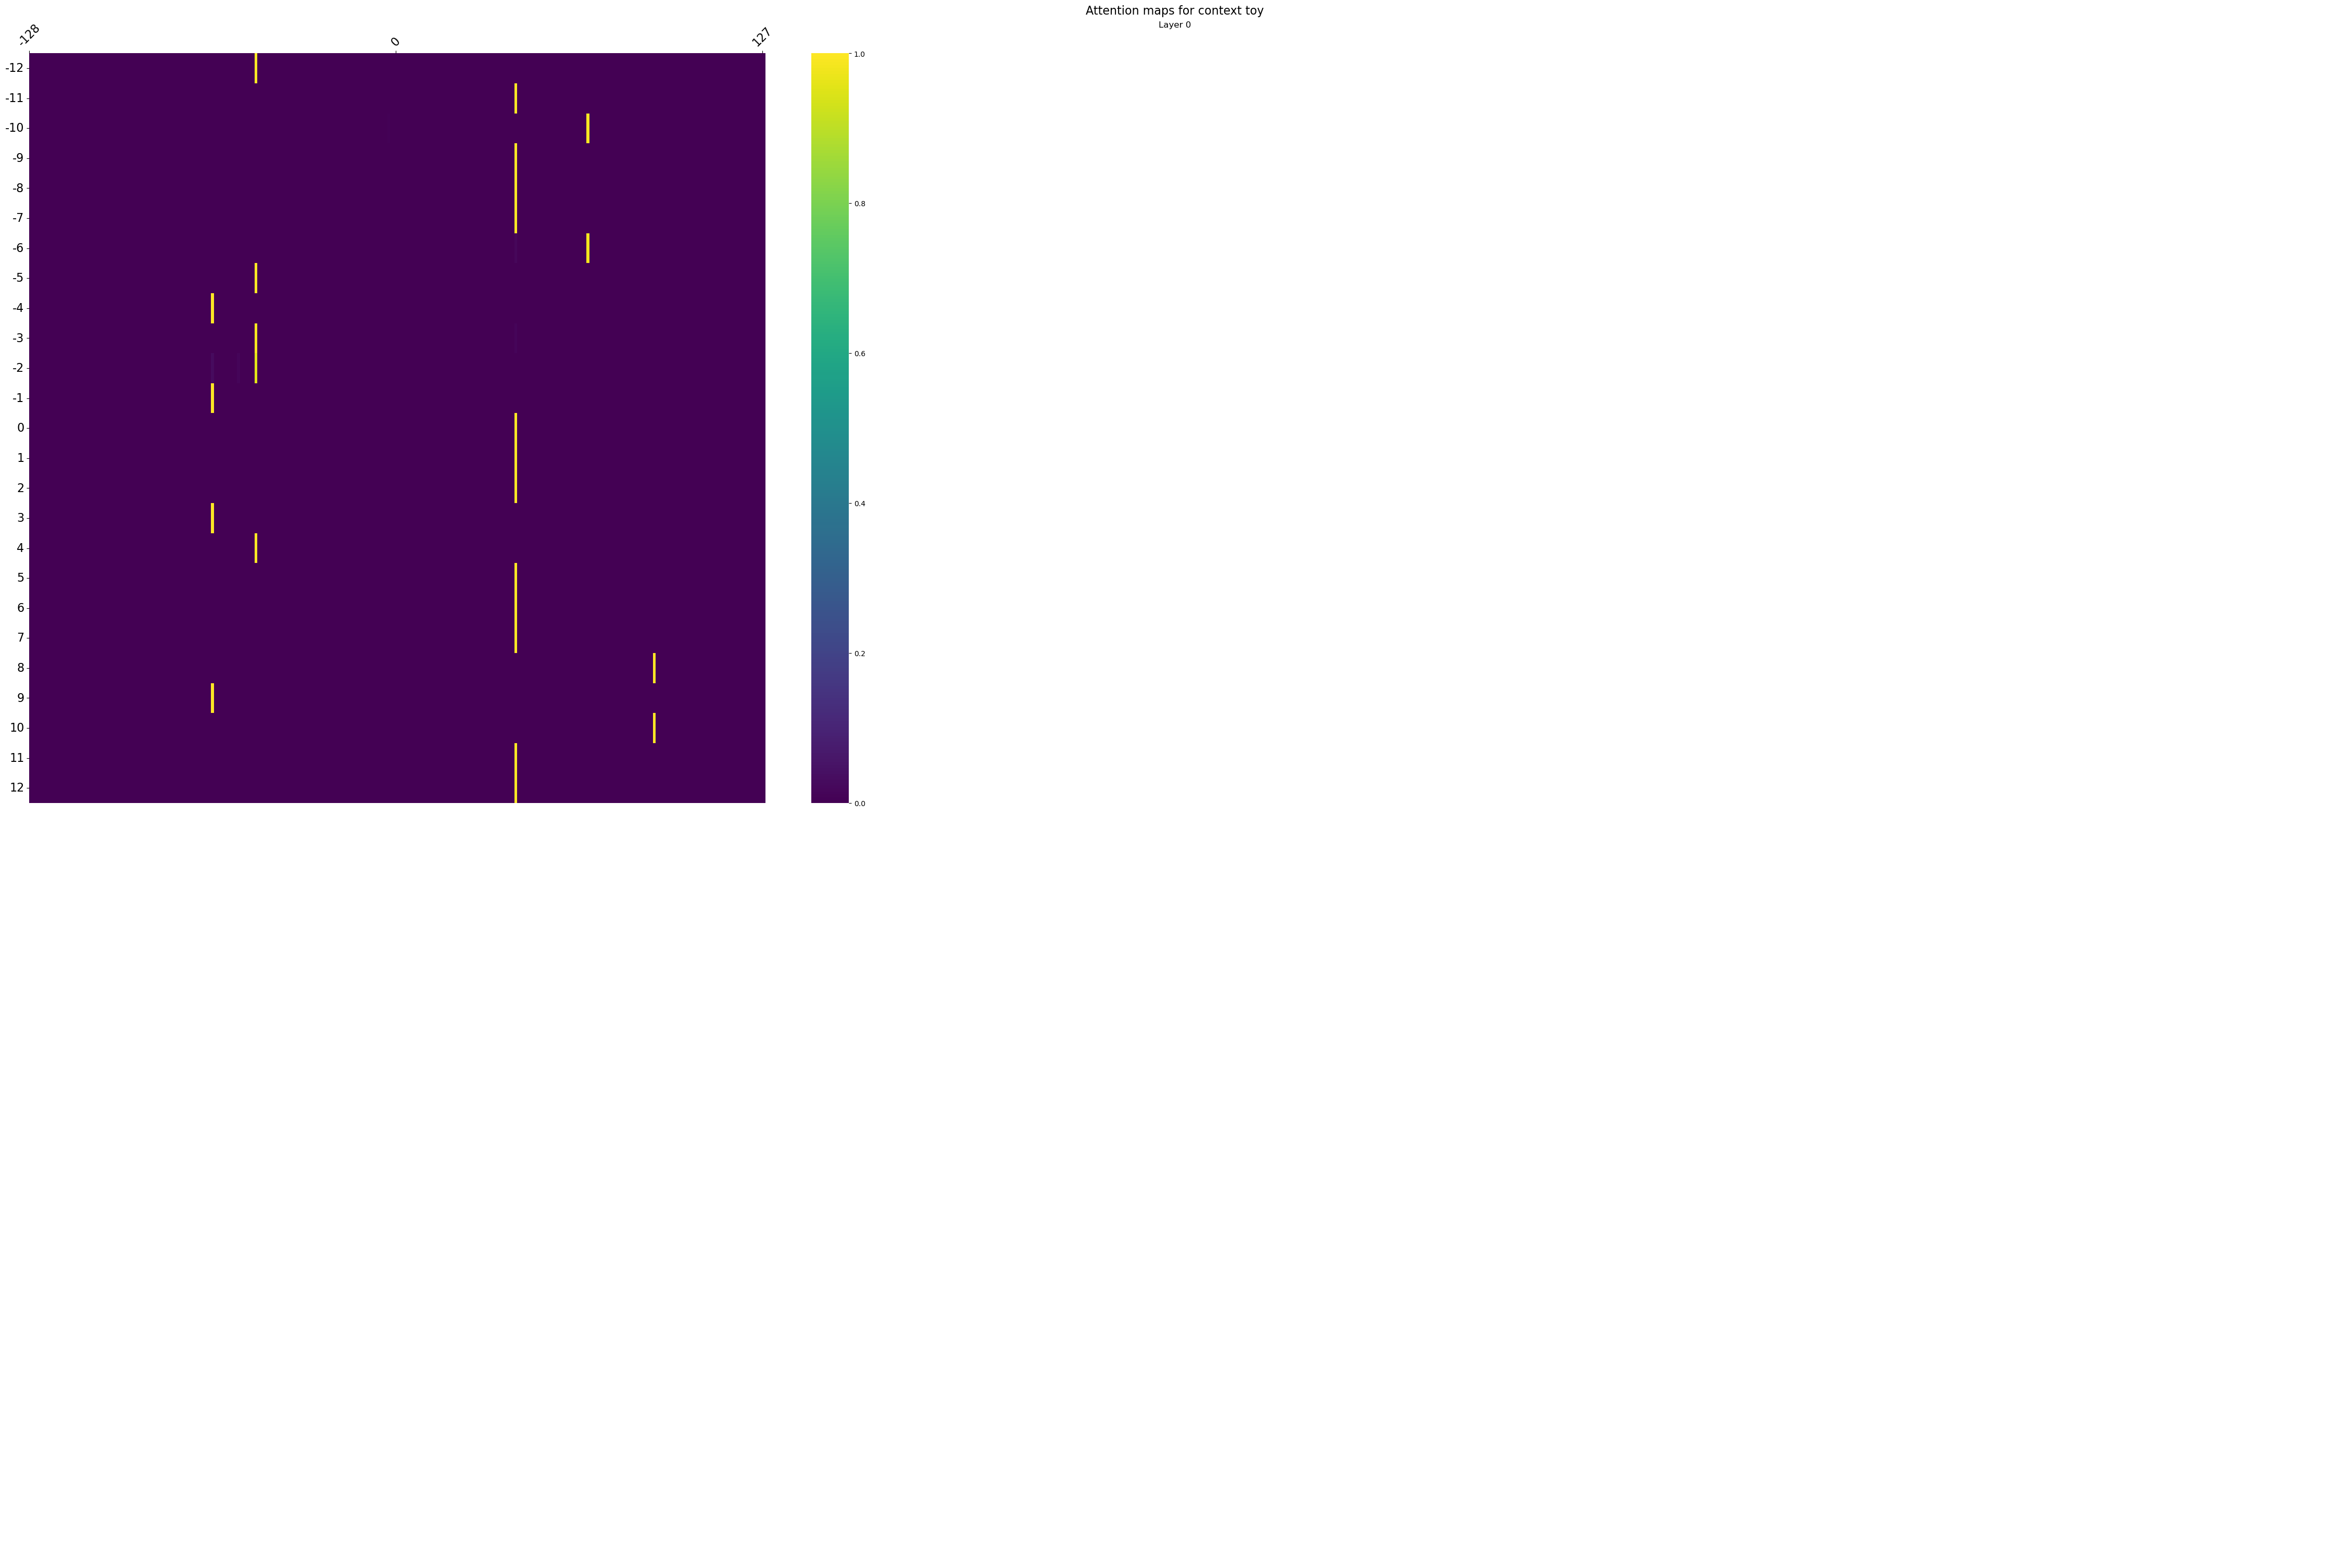

In [40]:
plot_attention_map('../results/context_3/attention_analysis/model_F_6h6ld384_c255/attention_context_toy', wo_labels=False, zoom=25, big=True)

In [51]:
plot_attention_map('../results/context_3/attention_analysis/model_F_6h6ld384_c255/attention_example_6',wo_labels=False, big=True, zoom=7)

In [36]:
### still wrong 
'''
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

def load_attention_files(context_folder):
    csv_files = [file for file in os.listdir(context_folder) if (file.endswith(".csv") and file.startswith("layer"))]
    layers = sorted(set(file.split('_')[0] for file in csv_files))
    return csv_files, layers

def preprocess_attention_data(context_folder, layer_files, zoom):
    attention_maps = []
    for file in layer_files:
        if file.startswith(layer) and file.endswith(".csv"):
            attention = pd.read_csv(os.path.join(context_folder, file))
            attention = attention.round(5)
            attention.set_index('Unnamed: 0', inplace=True, drop=True)
            attention.columns = [col.split('.')[0] for col in attention.columns]
            if zoom:
                start_row = (len(attention) - zoom) // 2
                end_row = start_row + zoom
                attention = attention.iloc[start_row:end_row]
                attention.index = range(-(zoom // 2), zoom // 2 + (zoom % 2))
            attention_maps.append(attention)
    return attention_maps

def plot_attention_heatmaps(fig, big_axes, layer_idx, attention_maps, layer_files, wo_labels, zoom):
    gs = big_axes[layer_idx].get_gridspec()
    ax_layer = fig.add_subplot(gs[layer_idx])
    ax_layer.axis('off')
    sub_gs = gs[layer_idx].subgridspec(2, 3)

    for idx, attention in enumerate(attention_maps):
        ax = fig.add_subplot(sub_gs[idx // 3, idx % 3])
        sns.heatmap(attention, annot=False, cmap="viridis", cbar=idx == len(layer_files) - 1, ax=ax, vmin=0, vmax=1)
        ax.set_title('')
        ax.set_ylabel('', fontsize=16)

        if not wo_labels:
            if idx != 0:
                ax.set_xticklabels([])
                ax.tick_params(bottom=False)
            else:
                ax.xaxis.set_ticks_position('top')
                ax.xaxis.set_label_position('top')

            for tick in ax.get_yticklabels():
                tick.set_rotation(360)
                tick.set_fontsize(16)
        else:
            for tick in ax.get_yticklabels():
                tick.set_rotation(360)
                tick.set_fontsize(16)

        if zoom:
            x_labels = list(attention.columns)
            mid_col = len(x_labels) // 2
            tick_positions = [0, mid_col, len(x_labels) - 1]
            new_x_labels = [''] * len(x_labels)
            new_x_labels[0] = str(-(len(x_labels) // 2))
            new_x_labels[mid_col] = '0'
            new_x_labels[-1] = str(len(x_labels) // 2)
            ax.set_xticks(tick_positions)
            ax.set_xticklabels([new_x_labels[pos] for pos in tick_positions], fontsize=16, rotation=45)

def plot_attention_map(context_folder, wo_labels=False, big=False, zoom=None):
    warnings.filterwarnings("ignore", message=".*missing from current font.*")
    context = context_folder.split('_')[-1]
    csv_files, layers = load_attention_files(context_folder)
    num_layers = len(layers)

    fig, big_axes = plt.subplots(num_layers, 1, figsize=(3, 2 * num_layers), constrained_layout=True) if not big else plt.subplots(num_layers, 1, figsize=(45, 30 * num_layers), constrained_layout=True)
    
    if context_folder.endswith("average"):  
        fig.suptitle(f"Averaged attention maps across all contexts", fontsize=10)
    else:
        fig.suptitle(f"Attention maps for context {context}", fontsize=16)

    if num_layers == 1:
        big_axes = [big_axes]

    for layer_idx, layer in enumerate(layers):
        layer_files = [file for file in csv_files if file.startswith(layer)]
        layer_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))
        big_axes[layer_idx].set_title(f"Layer {layer.split('layer')[1]}", fontsize=12)
        big_axes[layer_idx].axis('off')
        
        attention_maps = preprocess_attention_data(context_folder, layer_files, zoom)
        plot_attention_heatmaps(fig, big_axes, layer_idx, attention_maps, layer_files, wo_labels, zoom)

    plt.show()

# Example usage
# plot_attention_map('path_to_context_folder', zoom=10)


# New model mode average attention

In [ ]:
model_I_folder= '../results/context3/attention_analysis/model_I'
res_I= calculate_average_attention(model_I_folder, purin_vs_pyrim=False, only_first=True)

context_type_idx 0
context 96 context 189 context 131 context 426 context 122 context 19 context 458 context 102 context 52 context 432 context 374 context 339 

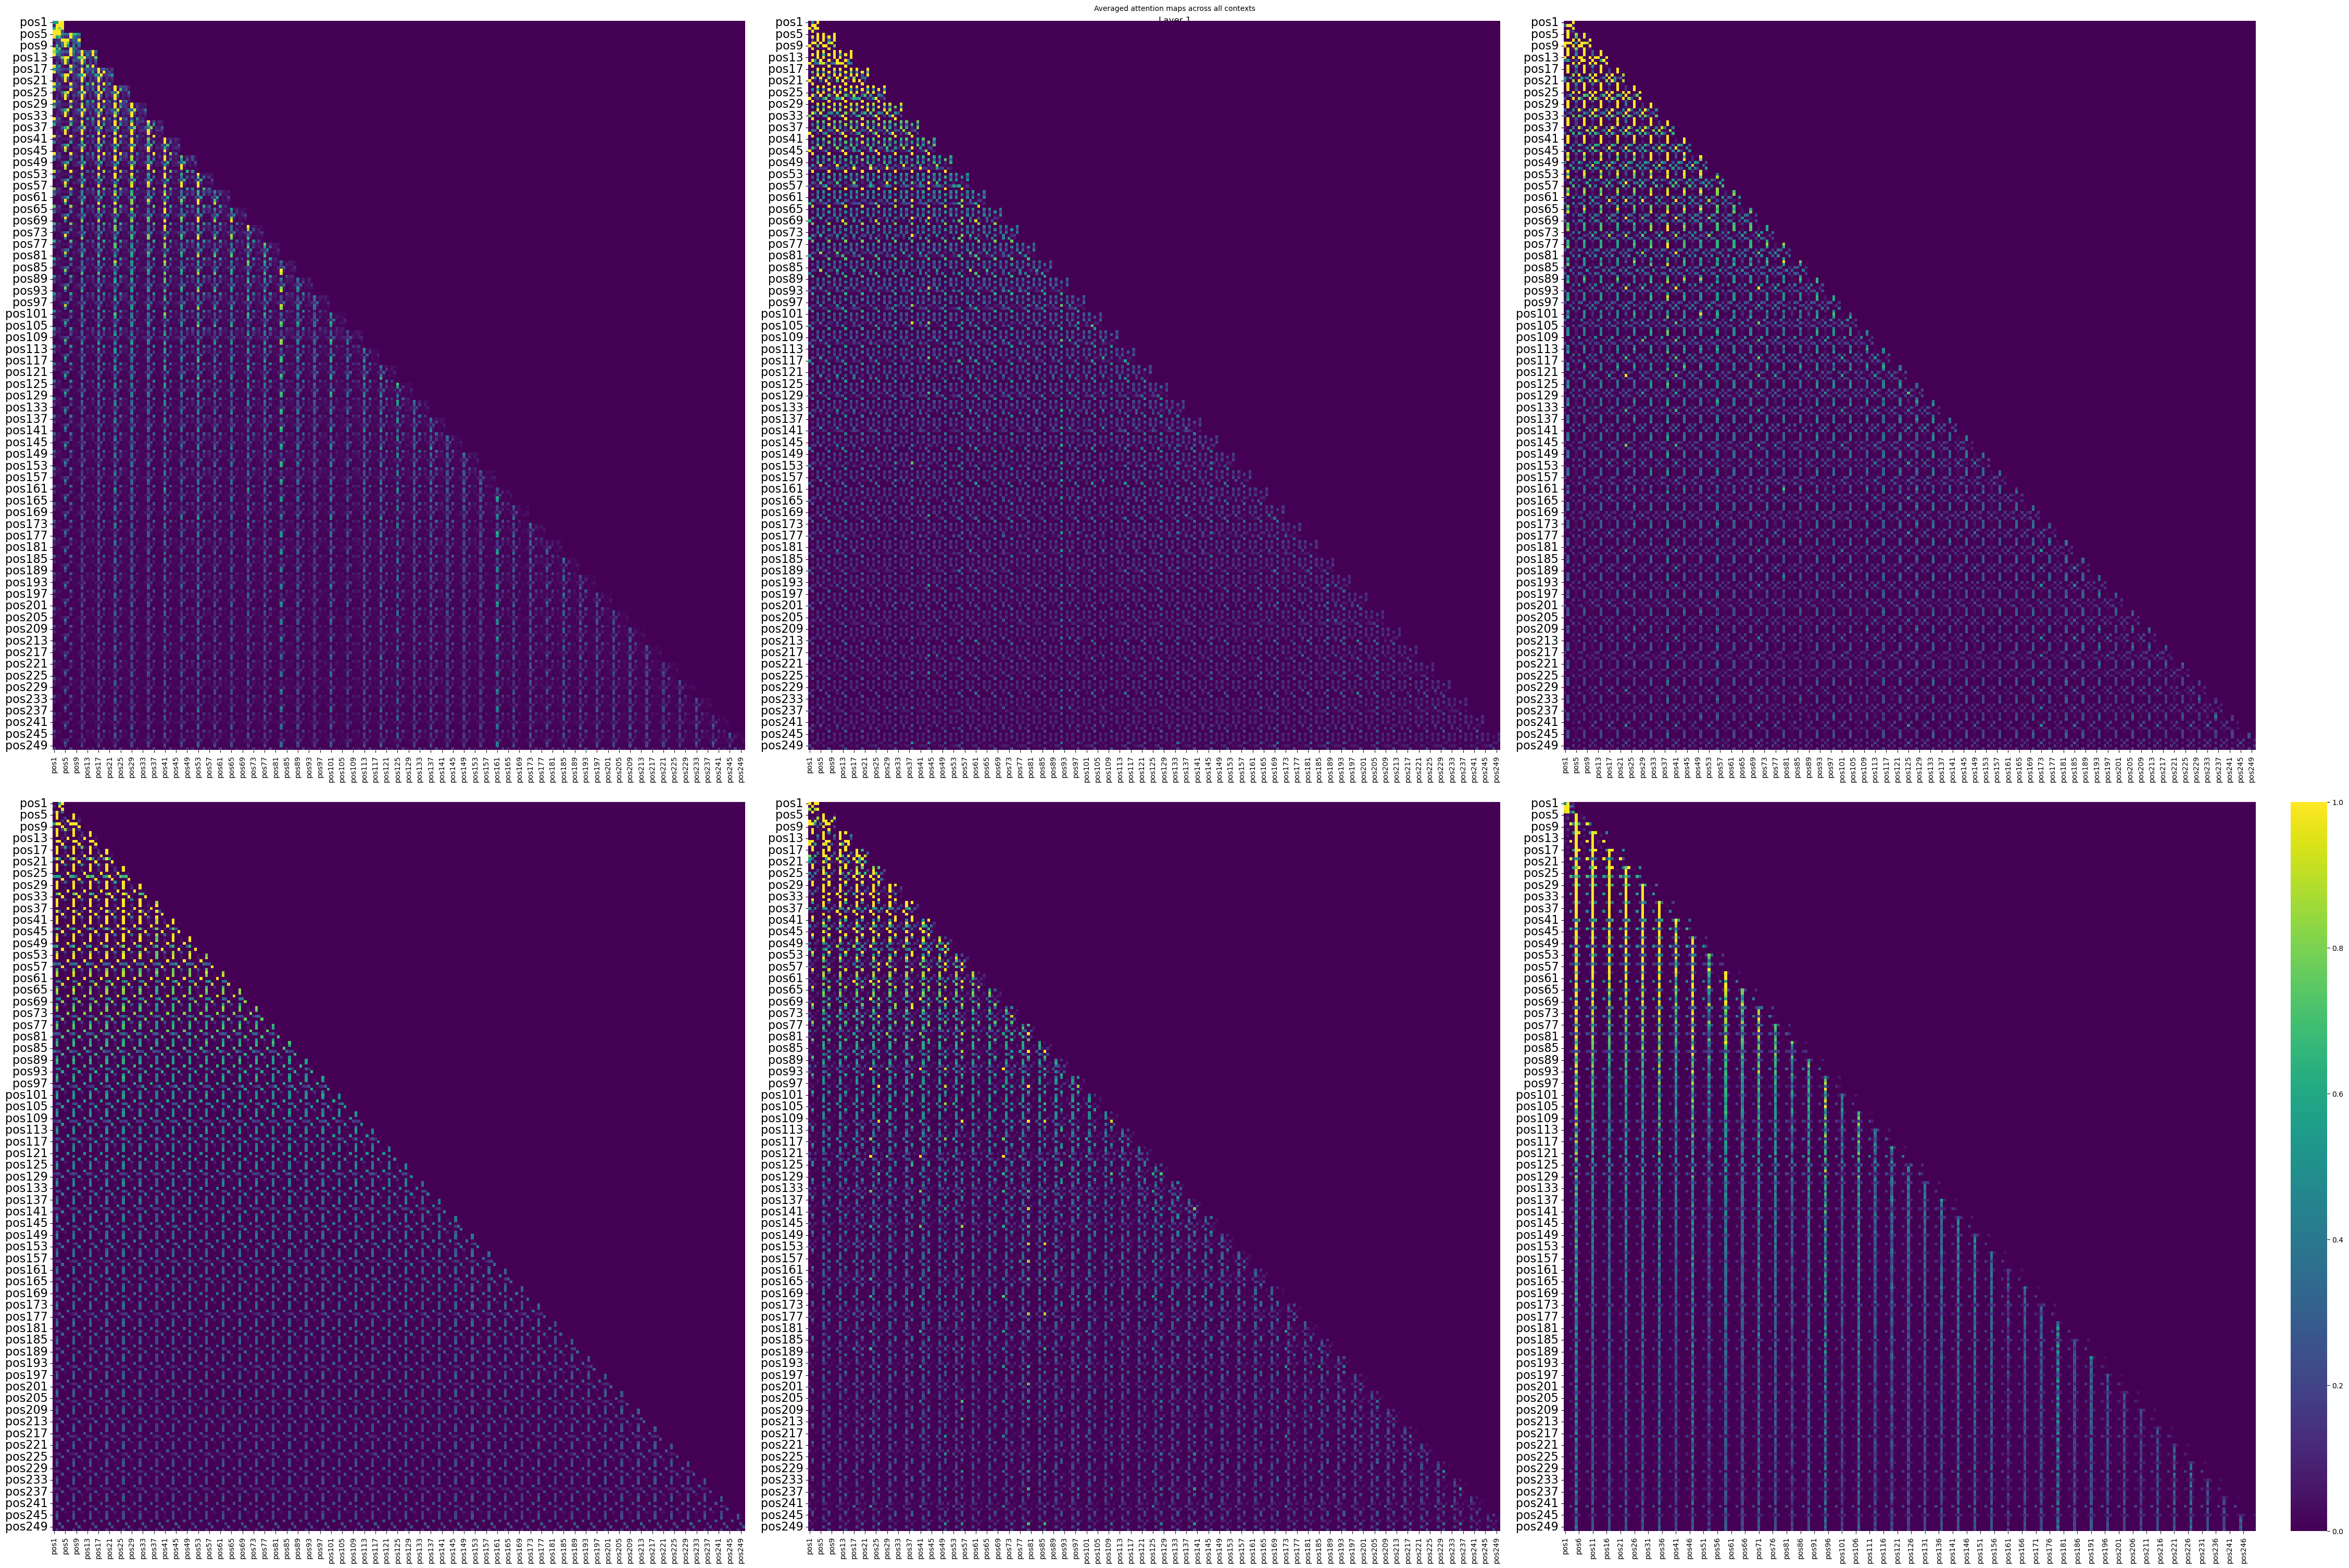

In [28]:
plot_attention_map('../results/context3/attention_analysis/test/average', wo_labels=True, big=True,make_brighter=10)

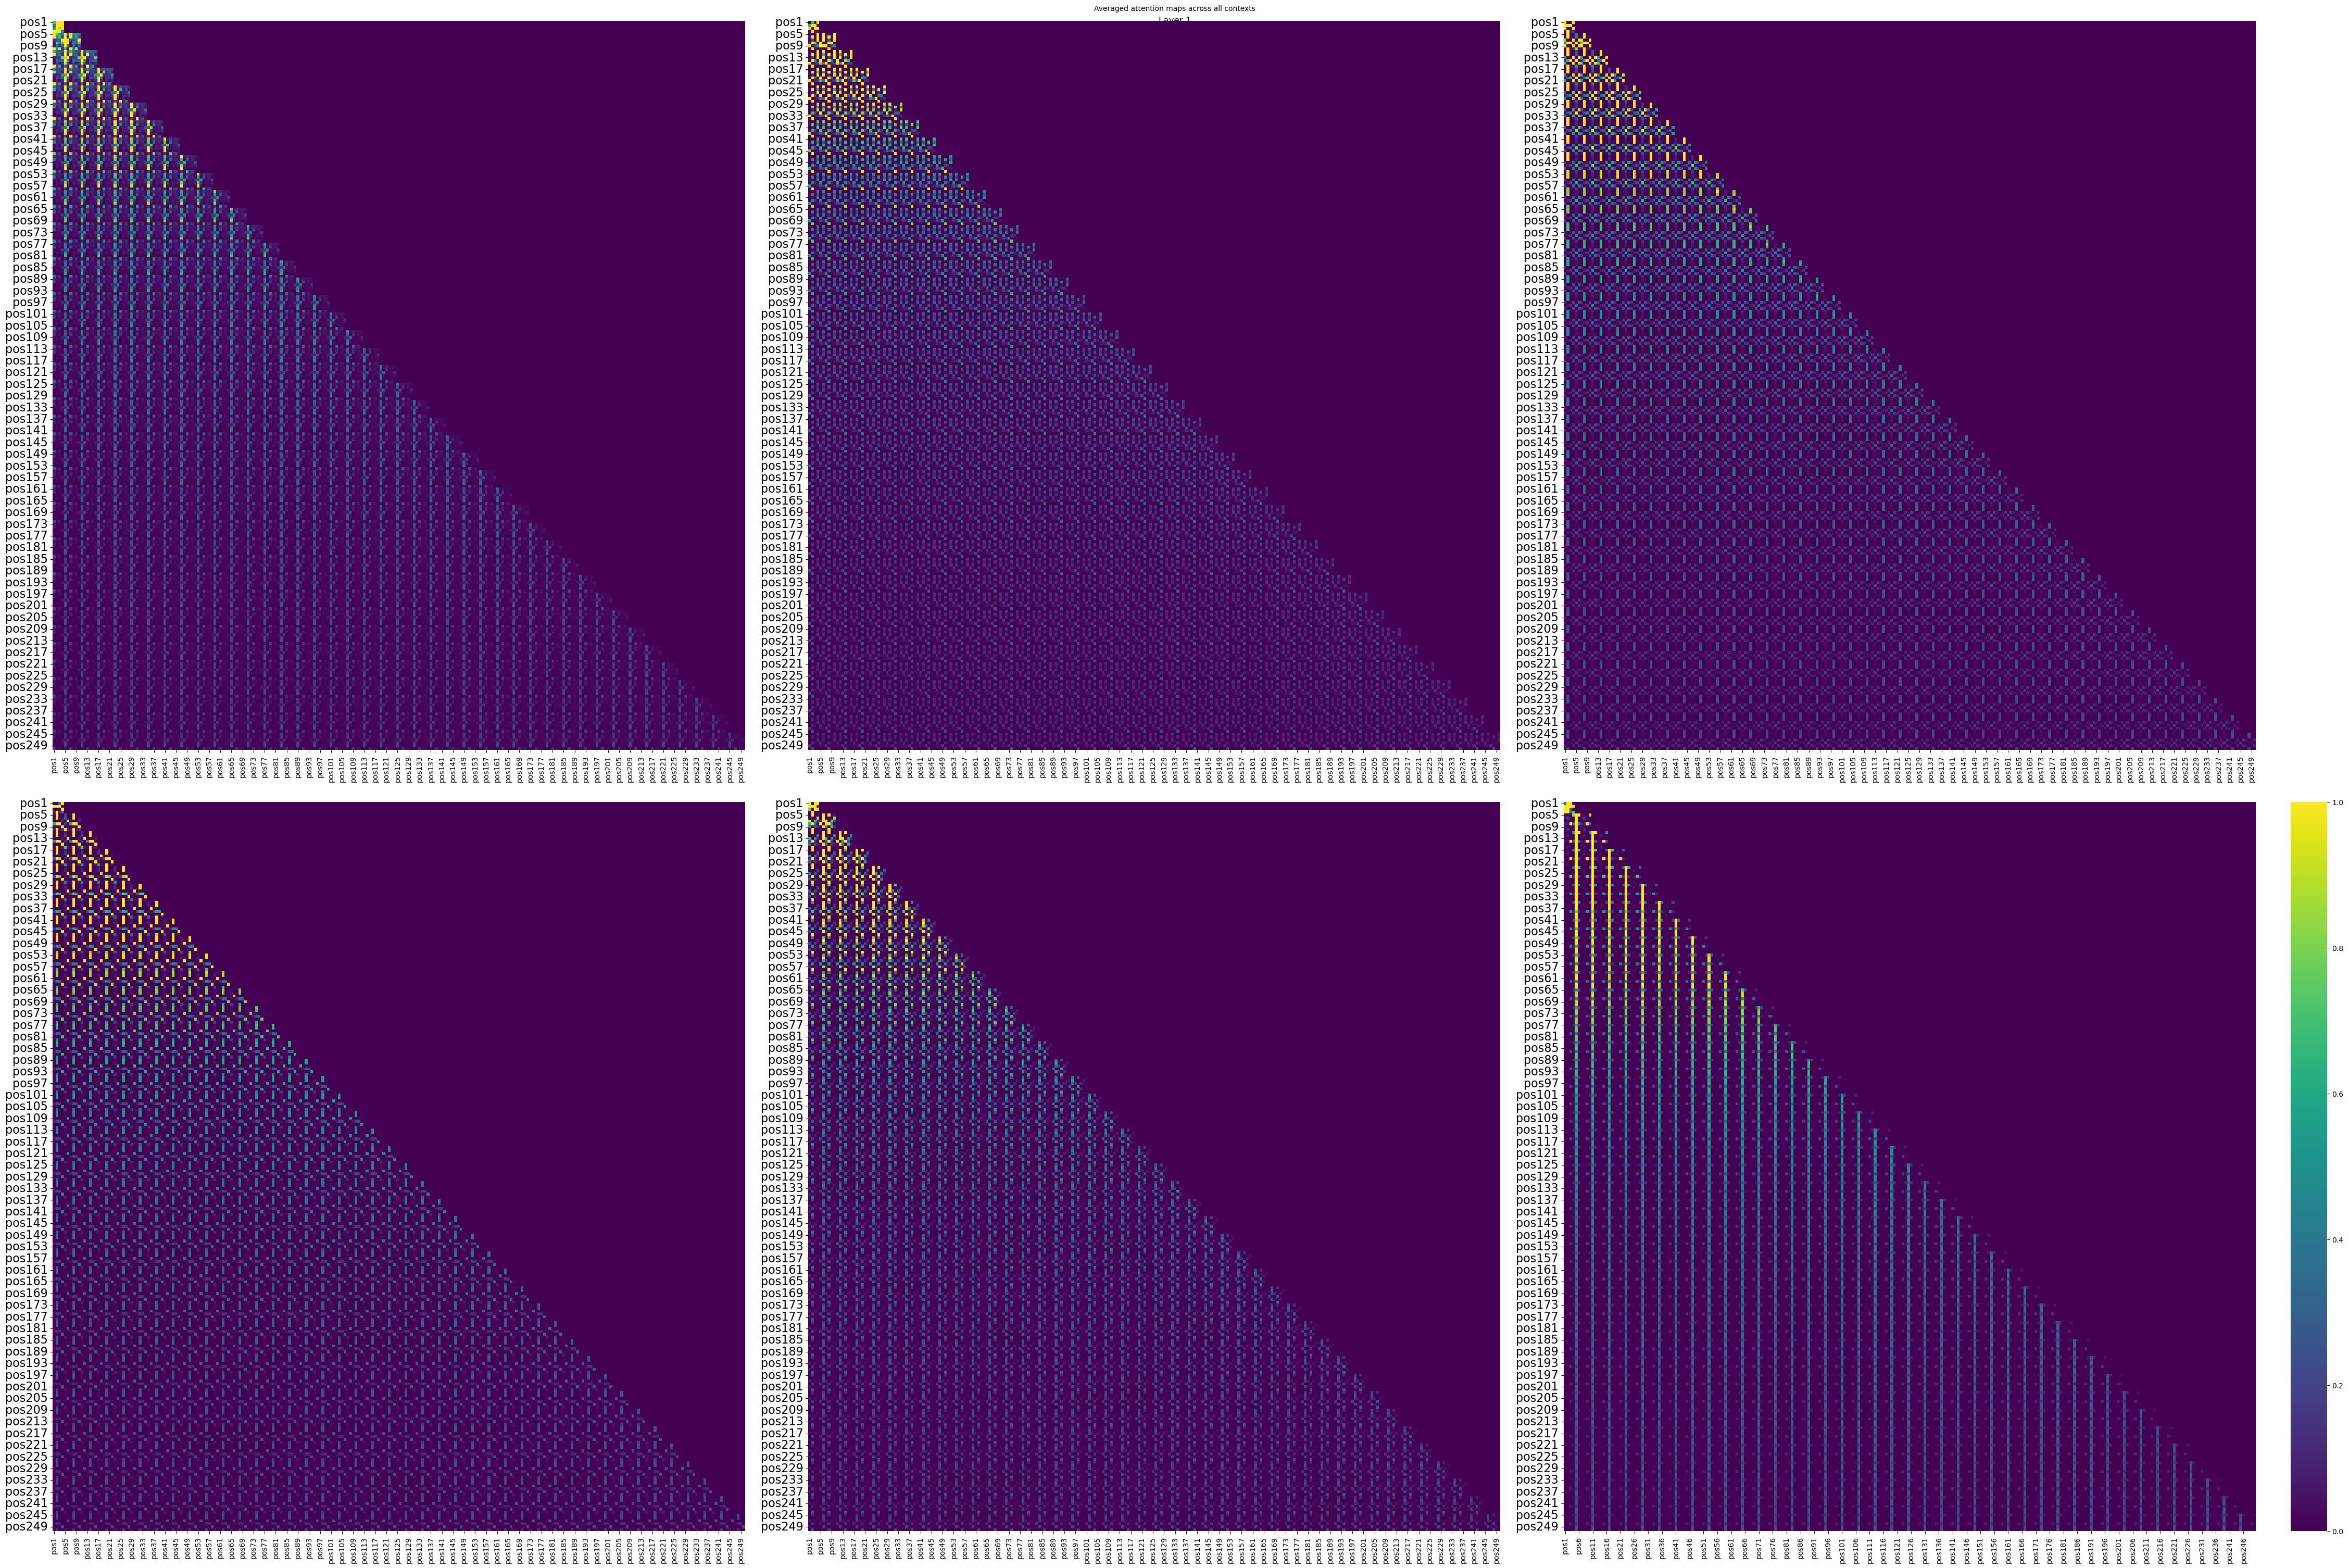

In [30]:
plot_attention_map('../results/context3/attention_analysis/model_I/average', wo_labels=True,  big=True, make_brighter=10)

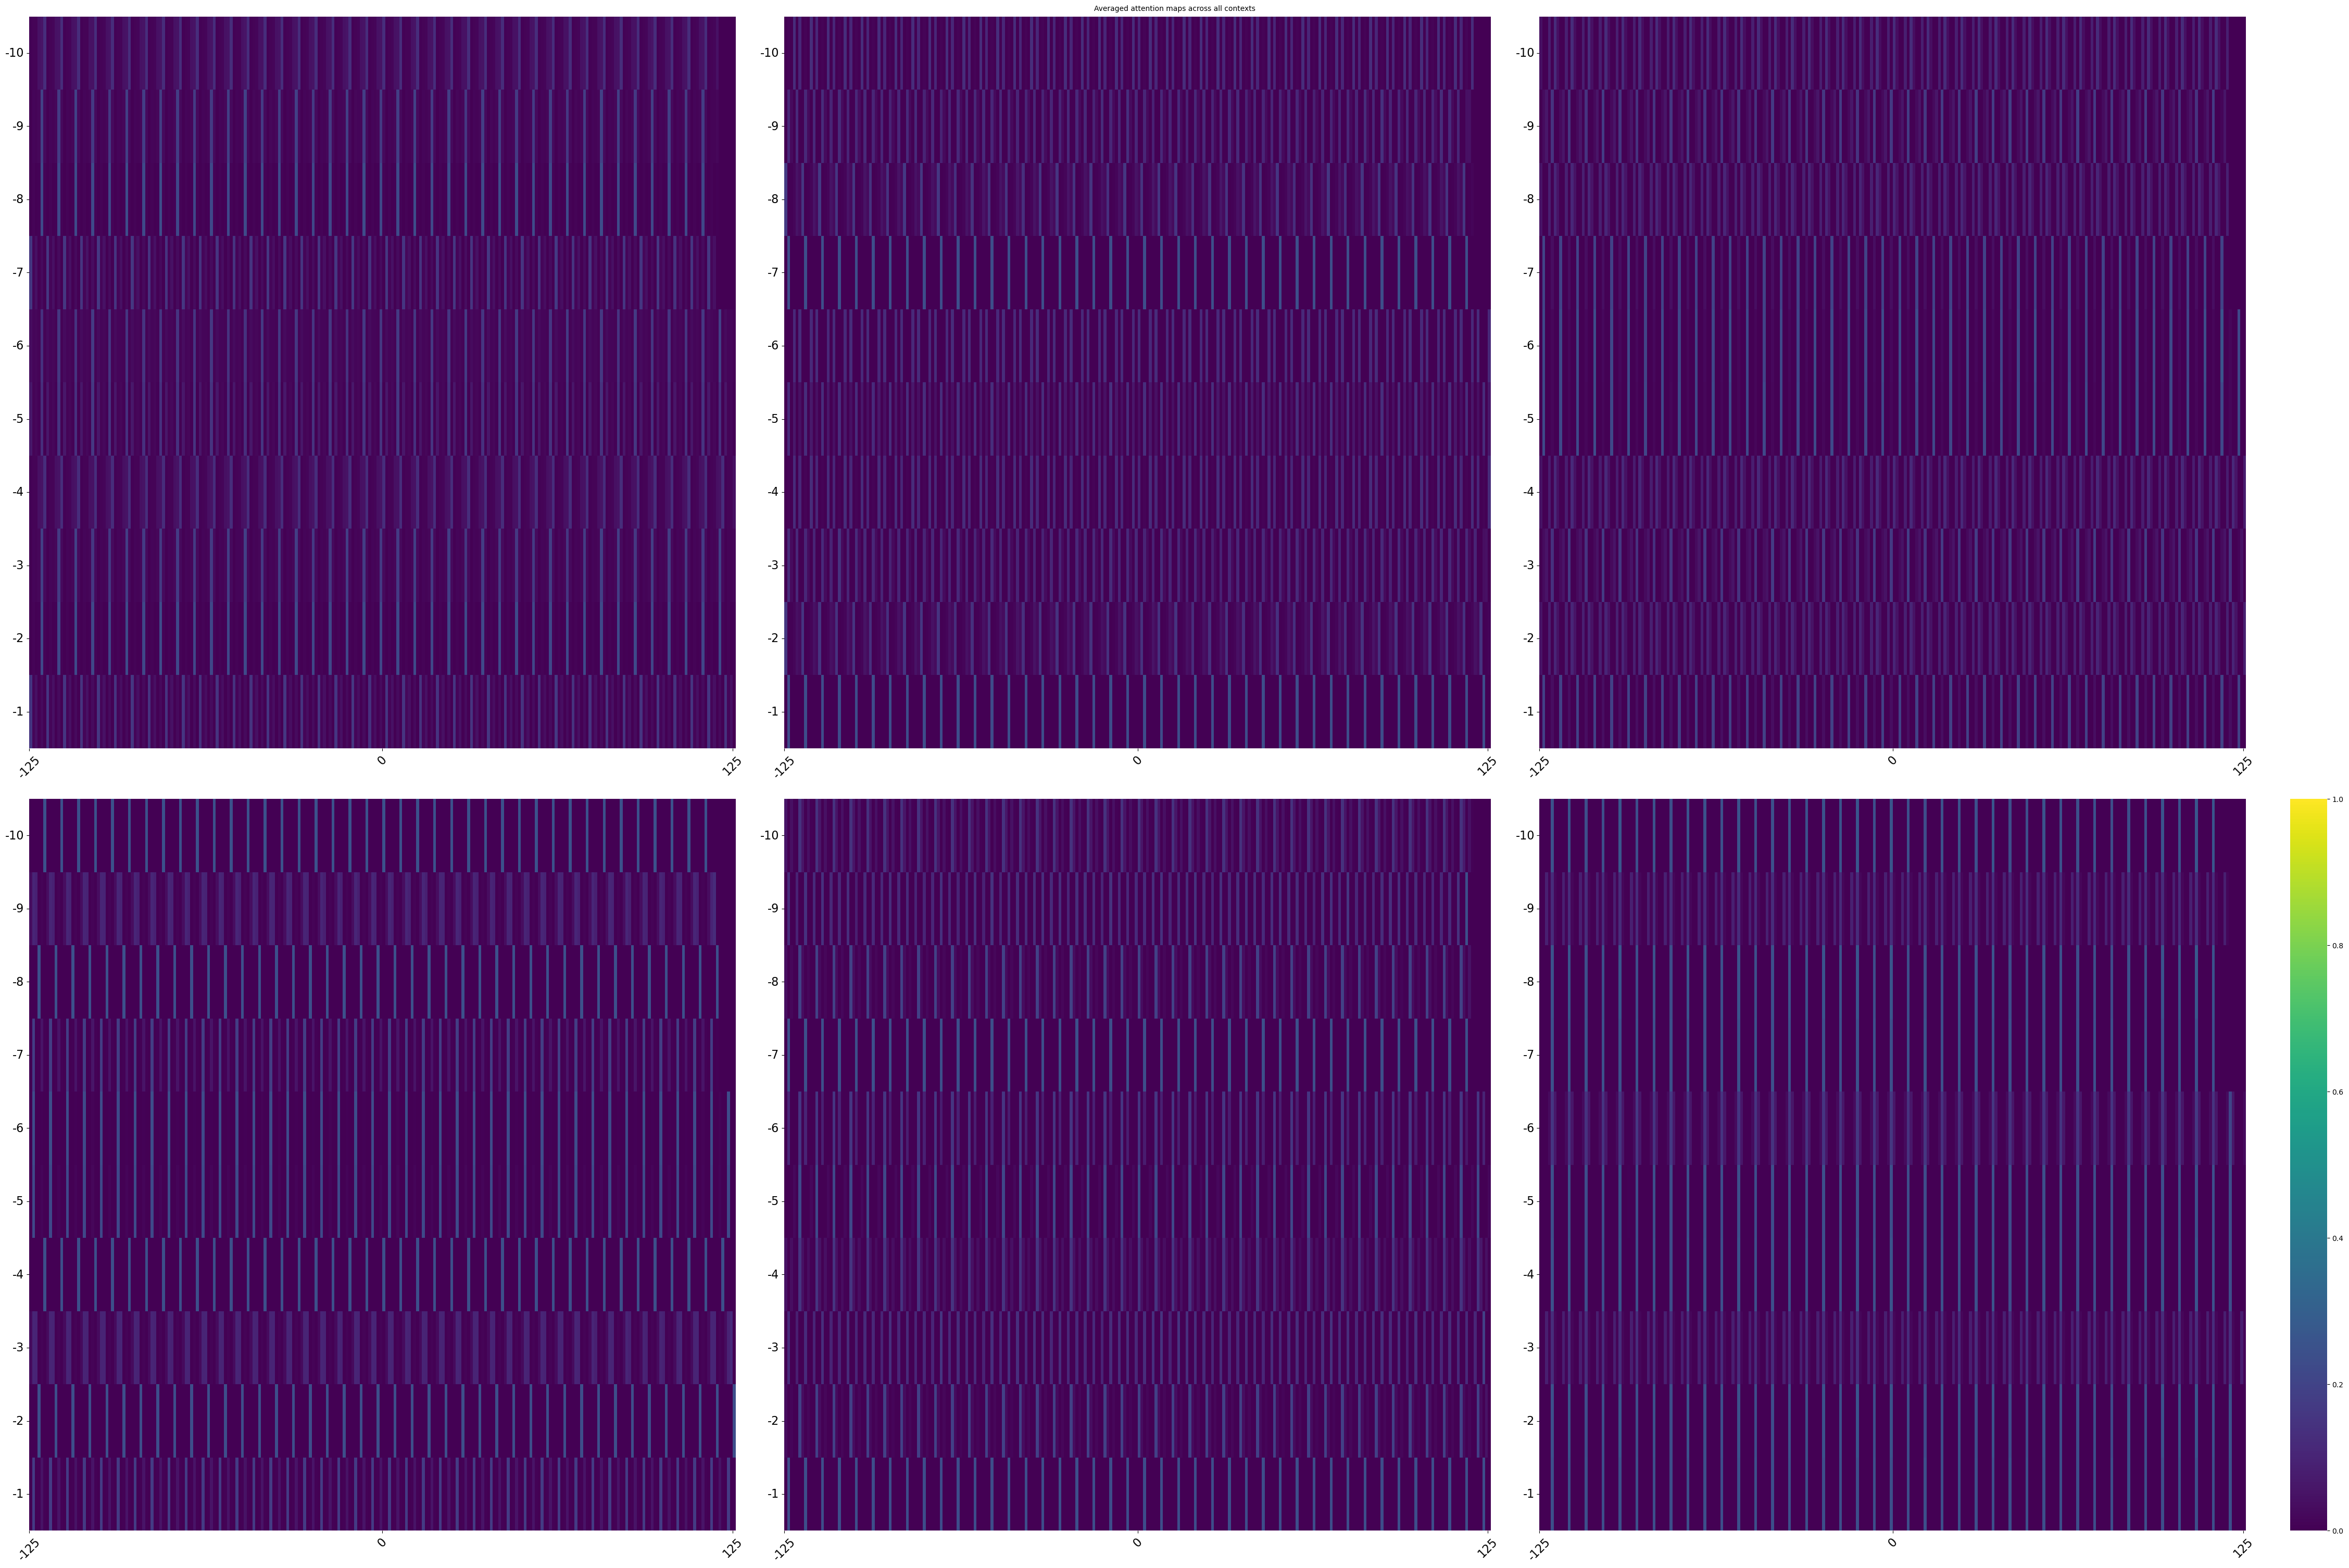

In [26]:
plot_attention_map('../results/context3/attention_analysis/model_I/average', wo_labels=True, big=True,zoom=10, from_end=True, make_brighter=10)